This script produces the plots featured in the main article.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import os
#print(os.getcwd())
from scipy.io import readsav
import numpy as np
import pandas as pd
from scipy.stats import linregress
from matplotlib.ticker import (MultipleLocator,  AutoMinorLocator, ScalarFormatter, AutoLocator)
from my_functions import S2, S3, S4, S5, s_transfer, S6, S7, marker_color
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rc('axes', linewidth=2)
plt.rcParams['font.size'] = '16'
from sklearn.metrics import r2_score
import joblib as jb

<span style="font-size:40px;">Figure 1</span>

In [4]:
df = pd.read_csv('../data/valid_tests.csv')
df, tnames, tstrength, legend_elements = marker_color(df)
N0 = 0.0187 # Brunt–Väisälä frequency (1/s)
fr = df['U(m/s)']/df['H0(m)']/N0
fr = sorted(list(set(np.floor(fr))))
df

,Test_name,U(m/s),Lm(km),H0(m),color,marker
0,B1high,5,1.60,16.0,tab:purple,o
1,B2mid,5,3.14,31.4,tab:red,s
2,B2high,10,3.14,31.4,tab:purple,s
3,B3low,5,6.28,62.8,tab:green,X
4,B3mid,10,6.28,62.8,tab:red,X
5,B3high,20,6.28,62.8,tab:purple,X
6,B4vlow,5,12.56,125.6,tab:orange,^
7,B4low,10,12.56,125.6,tab:green,^
8,B4mid,20,12.56,125.6,tab:red,^
9,B4high,40,12.56,125.6,tab:purple,^


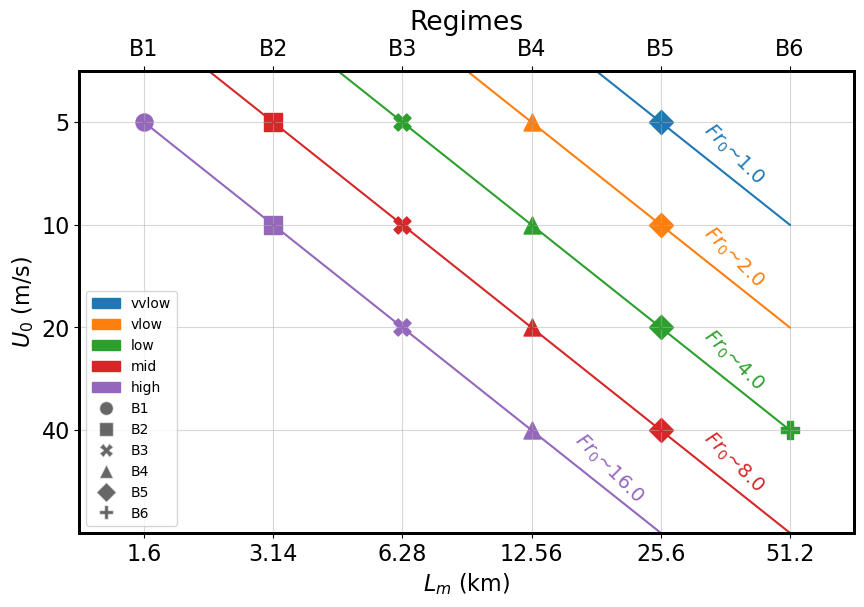

In [5]:
import matplotlib.colors as mcolors

# Define colors
tableau_colors = list(mcolors.TABLEAU_COLORS.keys())[:5]  # Adjust for unique Fr

# Define x and y ranges
x = np.arange(0, 6, 1)  # X-axis range
y = np.arange(0, 4, 1)  # Y-axis range

# Extract unique values for axis labels
unique_u_values = df["U(m/s)"].unique()  # Y-axis labels
unique_L_values = df["Lm(km)"].unique()  # X-axis labels
b_regimes = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']

fig, ax = plt.subplots(figsize=(10, 6))
k = 0  # Counter for indexing into df

# Loop for scatter points and diagonal line plotting
for i in x[:5]:
    for j in y:
        if i >= j:
            ax.scatter(i, j, color=df.at[k, 'color'], s=150, marker=df.at[k, 'marker'])
            k += 1

    ax.plot(x - i, color=tableau_colors[-i - 1])  

    # Adjust text positioning based on index
    text_x, text_y = (4.3, 0.6 + i) if i != 4 else (3.3, -0.3 + i)
    ax.text(text_x, text_y, f"$Fr_0$~{fr[i]}", color=tableau_colors[::-1][-i - 1], rotation=-45, fontsize=14)

# Extra scatter point
ax.scatter(5, 3, color=df.at[k, 'color'], s=150, marker=df.at[k, 'marker'])

# Set axis limits and labels
ax.set_xlim([-0.5, 5.5])
ax.set_ylim([-0.5, 4])
ax.set_xticks(x, unique_L_values)
ax.set_yticks(y, unique_u_values)

# Invert y-axis for proper orientation
ax.invert_yaxis()
ax.grid(True, alpha=0.5)

ax.set_xlabel("$L_m$ (km)")
ax.set_ylabel("$U_0$ (m/s)")
ax.set_title("Regimes")

# Add legend
ax.legend(handles=legend_elements, loc="lower left", fontsize=10)

# Secondary x-axis for regime labels
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())  # Sync limits with primary x-axis
ax2.set_xticks(x)
ax2.set_xticklabels(b_regimes)

# Save and show figure
plt.savefig("../article_figs/Fig1.png", bbox_inches="tight")
plt.show()

<span style="font-size:40px;">Figure 2</span>

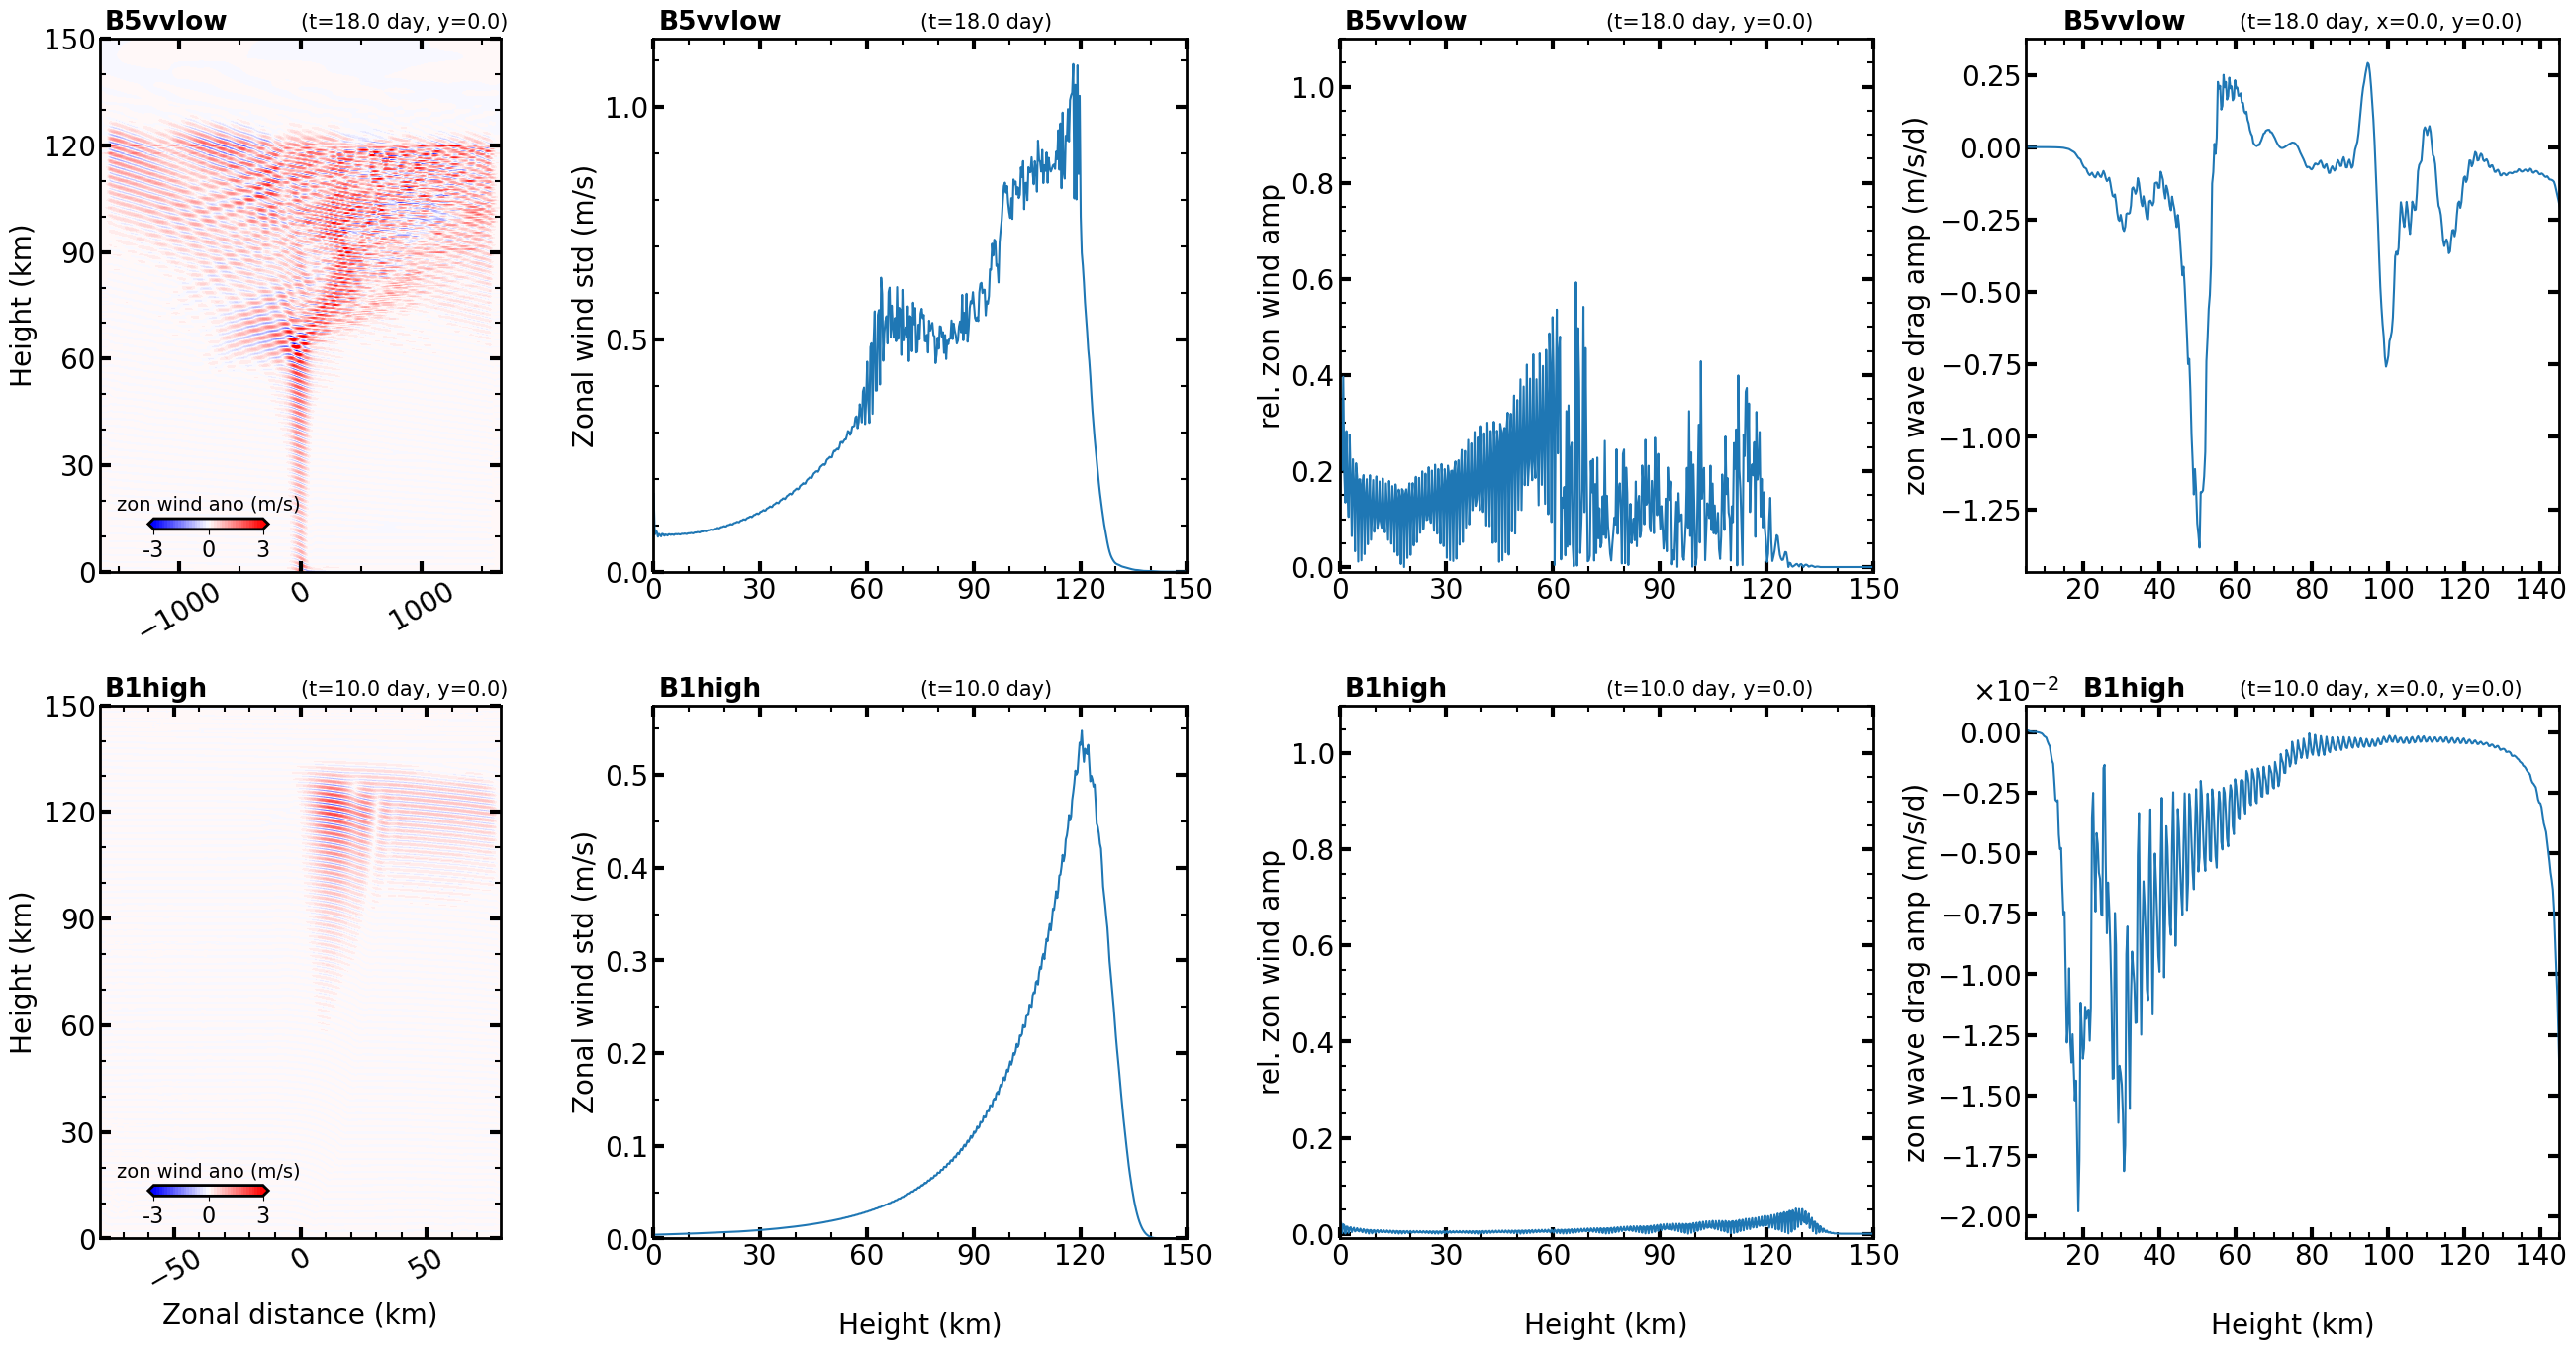

In [3]:
all_data = jb.load('../data/selected_simulations_time_short.pkl')
iname = ['B5vvlow', 'B1high']

all_data5 = jb.load('../data/FigS5.pkl') # wave drag! might change when I can calculate directly 

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(27, 14),
                         gridspec_kw={'width_ratios': [0.75, 1, 1, 1]})
fig.tight_layout(pad=2.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.25)

for i in [0,1]:
    data = all_data[iname[i]]
    lon = data['lon']
    height = data['height'][:,1]
    time = data['time']
    u = data['u(t,z,0,lon)']
    m_u = data['m_u(t,z)']
    std_u = data['std_up(z)']
    data5 = all_data5[iname[i]]
    a_x = data5['a_x']
    
    ######## zonal wind cross-section
    ax = axes[i,0]
    S2(lon, time, height, u, m_u, fig, ax,iname[i],3)
    ax.set_ylabel('Height (km)')
    if i==1: ax.set_xlabel('Zonal distance (km)')
    ######## standard deviation profiles
    ax = axes[i,1]
    S3(time,height,std_u.data,ax,iname[i])    
    ax.set_ylabel('Zonal wind std (m/s)')
    if i==1: ax.set_xlabel('Height (km)', labelpad=30)
    ######## relative fluctuations
    ax = axes[i,2]
    lon_m = int(len(data['lon'])/2)+1
    u0 = data['u(t,z,0,lon)'][:,lon_m]
    S4(lon, time, height, u0, m_u, ax,iname[i])
    ax.set_ylabel('rel. zon wind amp')
    if i==1: ax.set_xlabel('Height (km)', labelpad=30)
    ######## wave drag profiles
    ax = axes[i,3]
    lon_m = int(len(data['lon'])/2)+1
    S5(time, height, a_x, ax,iname[i])
    ax.set_ylabel('zon wave drag amp (m/s/d)')
    if i==1: ax.set_xlabel('Height (km)', labelpad=30)

# plt.savefig('../article_figs/Fig2.pdf', bbox_inches='tight')
# plt.savefig('../article_figs/Fig2.png', bbox_inches='tight', dpi=200)
plt.show()

<span style="font-size:40px;">Figure 3</span>

In [15]:
df = jb.load('../data/Fig3.pkl')
df, tnames, tstrength, legend_elements = marker_color(df)
df

,Test_name,color,marker,y,x,Fr
0,B1high,tab:purple,o,120.0,0.020795,20.051943
1,B2mid,tab:red,s,105.0,0.030904,10.155340
2,B3low,tab:green,X,80.0,0.057354,5.012986
3,B4vlow,tab:orange,^,50.0,0.099773,2.498536
4,B5vvlow,tab:blue,D,25.0,0.101136,1.229748
5,B2high,tab:purple,s,120.0,0.037052,20.051943
6,B3mid,tab:red,X,85.0,0.065507,10.025971
7,B4low,tab:green,^,50.0,0.077465,4.997071
8,B5vlow,tab:orange,D,30.0,0.126095,2.459496
9,B3high,tab:purple,X,95.0,0.071656,20.051943


[105.  80.  50.  25.  85.  50.  30.  95.  60.  45.  70.  50.  20.]


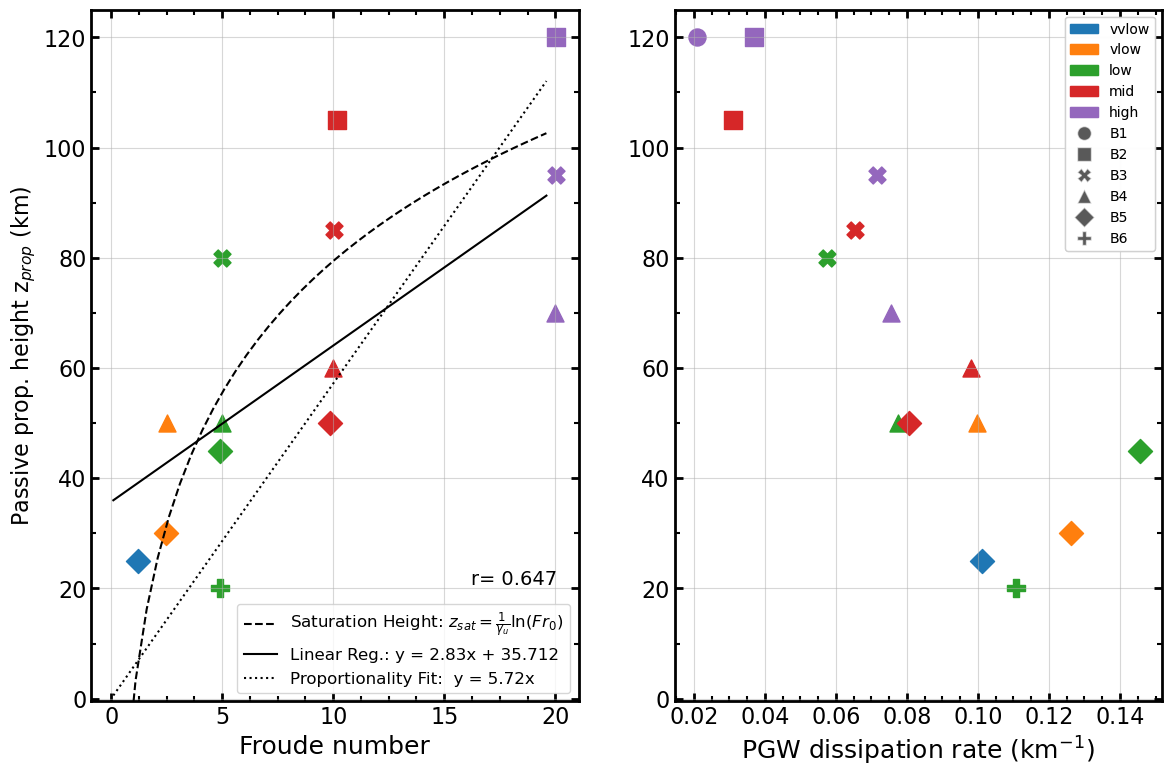

In [22]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.2)

for j in [0,1]:
    ax = axes[j]    
    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=6, width=2, direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=3.5, width=1.5, direction ='in', top=True, right=True)
    
    ###########################################################
    if j==0: x='Fr'
    if j==1: x='x'
    # Scatter plot with colors and markers
    for i in range(len(df)):    
        ax.scatter(df.at[i, x], df.at[i, 'y'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   
    
    #######################################################################################################    
    if j==0: ax.set_xlabel("Froude number",fontsize=18)   
    if j==1: ax.set_xlabel("PGW dissipation rate (km$^{-1}$)",fontsize=18)        
    if j==0: ax.set_ylabel("Passive prop. height z$_{prop}$ (km)")    
    #######################################################################################################    
        # Calculate and plot saturation height
    if j==0:
        
        mask = (df['y'] < 118)
        x_clean = df['Fr'][mask].values
        y_clean = df['y'][mask].values
        print(y_clean)
        gamma_u = 0.029
        fr = np.arange(0.1, 20, 0.5)
        z_sat = np.log(fr) / gamma_u
        p1 = ax.plot(fr, z_sat, '--k', label='Saturation Height')
        
        # Perform Linear Regression (y = mx + c)
        slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
        y_linreg = slope * fr + intercept
        p2 = ax.plot(fr, y_linreg, '-k', label='Linear Regression')
        
        # Perform Proportionality Fit (y = mx)
        slope_proportional = np.sum(x_clean * y_clean) / np.sum(x_clean**2)  # Least-squares slope with intercept = 0
        y_proportional = slope_proportional * fr
        p3 = ax.plot(fr, y_proportional, ':k', label='Proportionality Fit')
        
        # Add additional legend for p1, p2, p3
        additional_legend = ax.legend(handles=[
            plt.Line2D([0], [0], linestyle='--', color='k', label=r'Saturation Height: $z_{sat}=\frac{1}{\gamma_u}\ln (Fr_0)$'),
            plt.Line2D([0], [0], linestyle='-', color='k', label="Linear Reg.: y = {:.2f}x + {:.3f}".format(slope, intercept)),
            plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit:  y = {:.2f}x".format(slope_proportional))
        ], loc="lower right", fontsize=12)
        
        ax.text(0.78, 0.19, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
                , transform=ax.transAxes, fontsize=14,
                verticalalignment='top', horizontalalignment='left')
    else:
        
        # Legend for scatter points
        scatter_legend = ax.legend(handles=legend_elements, loc="upper right", fontsize=10)
        ax.add_artist(scatter_legend)  # Add the scatter legend manually
       ###########################################################
    if j==0 : x_major = 5
    if j==1 : x_major = 0.02
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_minor_locator(MultipleLocator(10))
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    ax.xaxis.set_minor_locator(MultipleLocator(x_major/4))
    # Set axis limits
    ax.set_ylim([-0.5, 125])

plt.savefig('../article_figs/Fig3.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig3.pdf',bbox_inches='tight')
plt.show()

<span style="font-size:40px;">Figure 4</span>

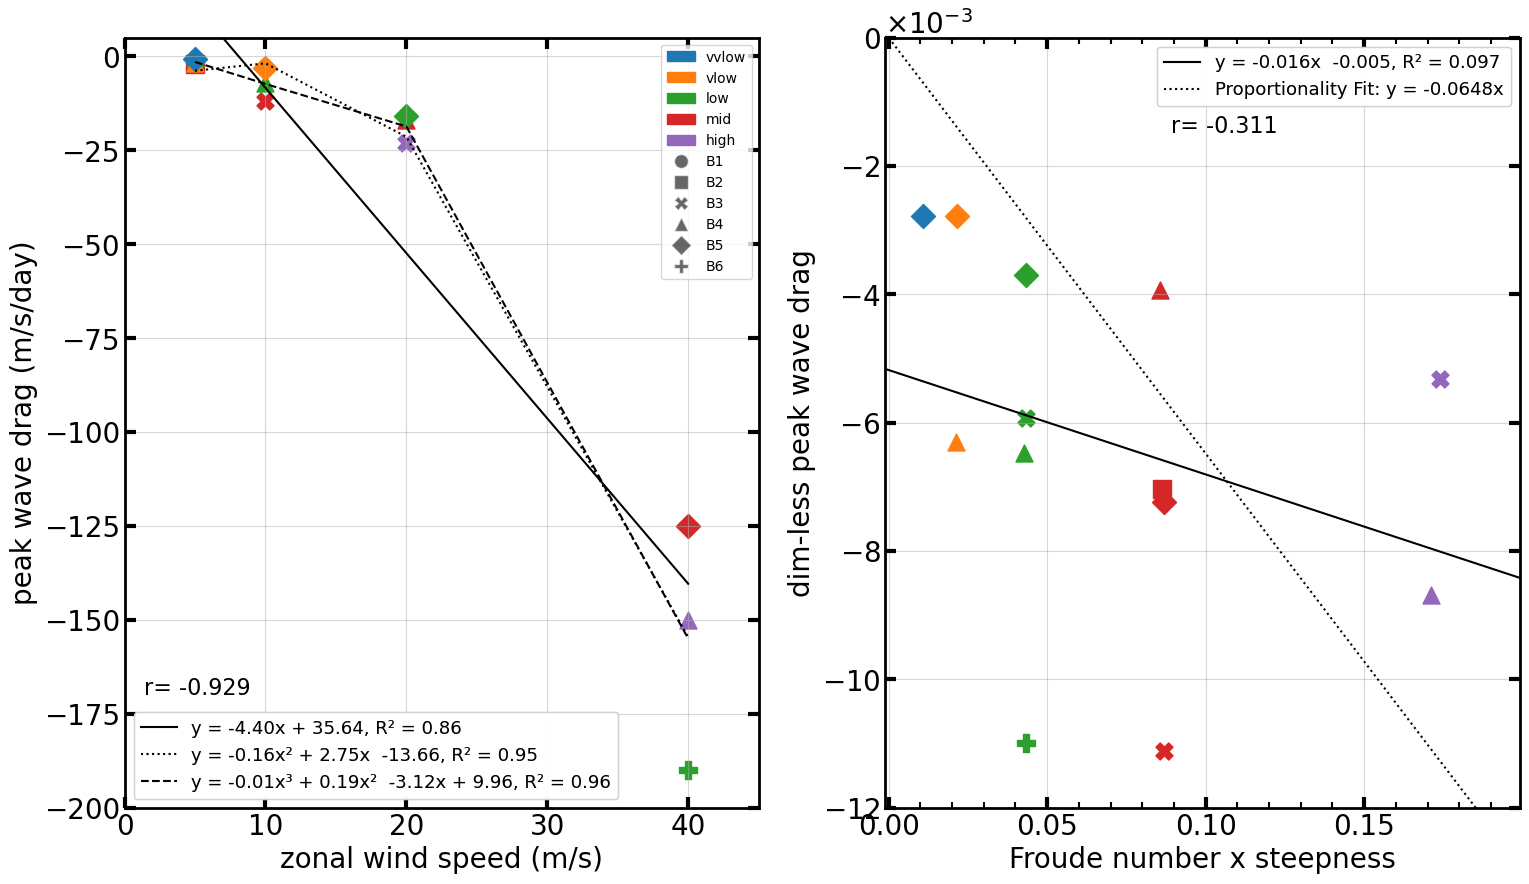

In [7]:
df = jb.load('../data/Fig4.pkl')
df, tnames, tstrength, legend_elements = marker_color(df)
df
##############
mask = ~np.isnan(df.pwd)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
for ax in axes:
    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
####################################################### left panel
ax = axes[0]
# Scatter plot with colors and markers
x_clean = df['u'][mask]
y_clean = df['pwd'][mask]

for i in range(len(df)):    
    ax.scatter(df.at[i, 'u'], df.at[i, 'pwd'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   

# Set axis limits
x= np.arange(-0.001,45,1)
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([-200, 5])

# Add grid and labels
ax.set_xlabel("zonal wind speed (m/s)")
ax.set_ylabel("peak wave drag (m/s/day)")

# Legend for scatter points
scatter_legend = ax.legend(handles=legend_elements, loc="upper right", fontsize=10)
ax.add_artist(scatter_legend)  # Add the scatter legend manually

# Try fitting a polynomial relationship
x = x_clean
y = y_clean

# Linear fit
coeffs_linear = np.polyfit(x, y, 1)  # Degree 1 polynomial
y_linear = np.polyval(coeffs_linear, x)
r2_linear = r2_score(y, y_linear)
ax.plot(x, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

# Quadratic fit
coeffs_quadratic = np.polyfit(x, y, 2)  # Degree 2 polynomial
y_quadratic = np.polyval(coeffs_quadratic, x)
r2_quadratic = r2_score(y, y_quadratic)
ax.plot(x, y_quadratic, ':k', label=f"Quadratic Fit (R²={r2_quadratic:.2f})")

# Cubic fit
coeffs_cubic = np.polyfit(x, y, 3)  # Degree 3 polynomial
y_cubic = np.polyval(coeffs_cubic, x)
r2_cubic = r2_score(y, y_cubic)
ax.plot(x, y_cubic, '--k', label=f"Cubic Fit (R²={r2_cubic:.2f})")

# Add legend and show plot
additional_legend = ax.legend(handles=[
    plt.Line2D([0], [0], linestyle='-',  color='k', label="y = {:.2f}x + {:.2f}, R² = {:.2f}".format(*coeffs_linear, r2_linear)),
    plt.Line2D([0], [0], linestyle=':',  color='k', label="y = {:.2f}x² + {:.2f}x  {:.2f}, R² = {:.2f}".format(*coeffs_quadratic, r2_quadratic)),
    plt.Line2D([0], [0], linestyle='--', color='k', label="y = {:.2f}x³ + {:.2f}x²  {:.2f}x + {:.2f}, R² = {:.2f}".format(*coeffs_cubic, r2_cubic))
], loc="lower left", fontsize=13)

ax.add_artist(additional_legend)  # Add the line legend manually
ax.text(0.03, 0.17, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
        , transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left')

####################################################### right panel
x_clean = df['Fr*alpha'][mask]
y_clean = df['dim.pwd'][mask]

ax = axes[1]
# Scatter plot with colors and markers
for i in range(len(df)):    
    ax.scatter(df.at[i, 'Fr*alpha'], df.at[i, 'dim.pwd'], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   

# Set axis limits
x= np.arange(-0.001,0.23,0.05)
ax.set_xlim([x[0], x[-1]])
ax.set_ylim([-0.012, 0])

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(-3, -3))
ax.xaxis.set_major_locator(MultipleLocator(0.05)) 
ax.xaxis.set_minor_locator(MultipleLocator(0.01))

# Add grid and labels
ax.set_xlabel("Froude number x steepness")
ax.set_ylabel("dim-less peak wave drag")

# Perform Linear Regression (y = mx + c)
slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)
r2_linear = r2_score(y_clean, slope*x_clean+intercept)
y_linreg = slope * x + intercept
p2 = ax.plot(x, y_linreg, '-k', label='Linear Regression')

# Perform Proportionality Fit (y = mx)
slope_proportional = np.sum(x_clean * y_clean) / np.sum(x_clean**2)  # Least-squares slope with intercept = 0
y_proportional = slope_proportional * x
p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')

# Add additional legend for  p2, p3
additional_legend = ax.legend(handles=[
    plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.3f}x  {:.3f}, R² = {:.3f}".format(slope, intercept, r2_linear)),
    plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit: y = {:.4f}x".format(slope_proportional))
], loc="upper right", fontsize=13)

# Add both legends to the plot
ax.add_artist(additional_legend)  # Add the line legend manually

ax.text(0.45, 0.90, "r= "+str(np.round(np.corrcoef(x_clean, y_clean)[0,1],3))
        , transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left')
##################################################################### saving the plot
plt.savefig('../article_figs/Fig4.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig4.pdf',bbox_inches='tight')
plt.show()

<span style="font-size:40px;">Figure 5</span>

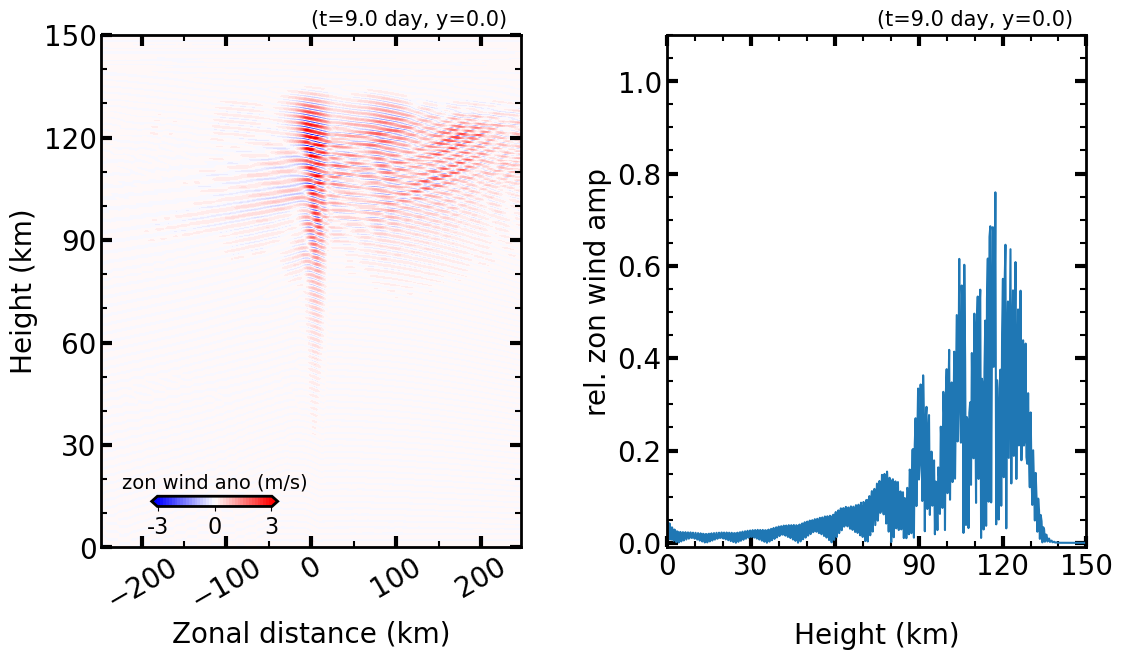

In [9]:
all_data = jb.load('../data/selected_simulations_time_short.pkl')

iname = 'B2mid'
data = all_data[iname]
lon = data['lon']
height = data['height'][:,1]
time = data['time']
u0 = data['u(t,z,0,lon)']
m_u = data['m_u(t,z)']
std_u = data['std_up(z)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
fig.tight_layout(pad=2.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.25)
######## zonal wind cross-section
ax = axes[0]
S2(lon, time, height, u0, m_u, fig, ax)
ax.set(xlabel='Zonal distance (km)', ylabel='Height (km)')

######## relative fluctuations
ax = axes[1]
lon_m = int(len(data['lon'])/2)+1
u0 = data['u(t,z,0,lon)'][:,lon_m]
S4(lon, time, height, u0, m_u, ax)
ax.set(ylabel='rel. zon wind amp')
ax.set_xlabel('Height (km)', labelpad=30)


plt.savefig('../article_figs/Fig5.pdf', bbox_inches='tight')
plt.savefig('../article_figs/Fig5.png', bbox_inches='tight', dpi=200)

<span style="font-size:40px;">Figure 6</span>

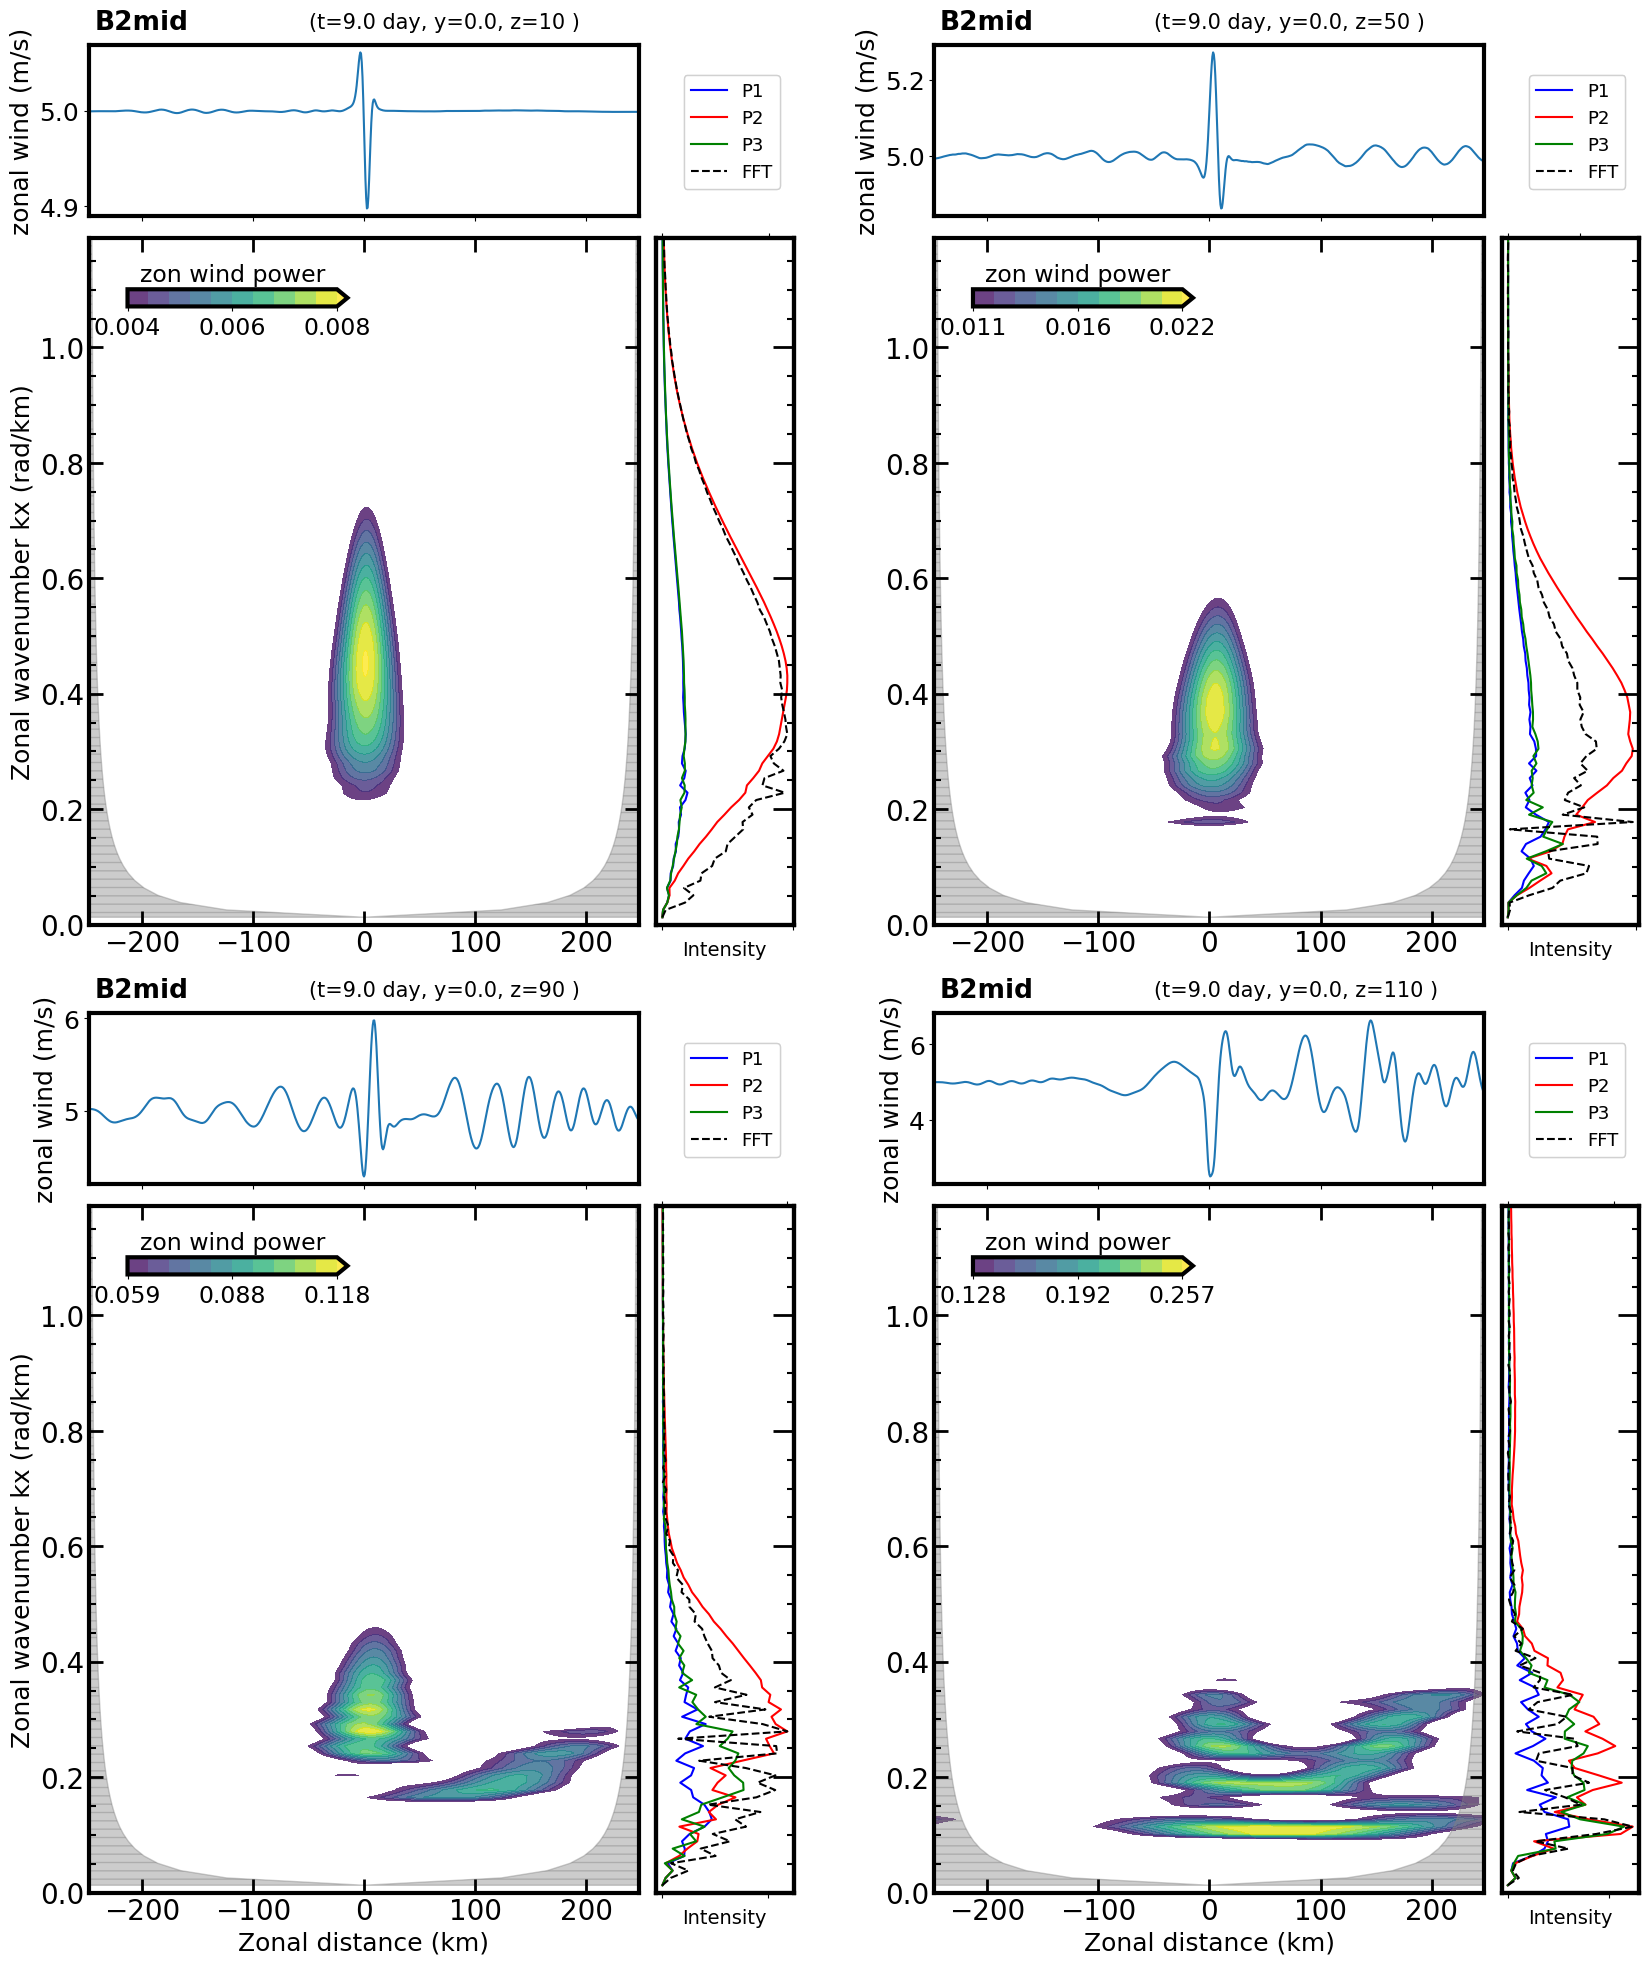

In [10]:
all_data = jb.load('../data/selected_simulations_time_short.pkl')
iname = 'B2mid'
data = all_data[iname]
u0 = data['u(t,z,0,lon)']
lon = data['lon']
time = data['time']
height = data['height'][:,1]

dx = abs(lon[0] - lon[1]) * 110
rows, cols = 2, 2
fig = plt.figure(figsize=(20, 24))  # Adjust aspect ratio
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.1)
################### S1, z=10 km
index = np.argmin(np.abs(height - 10.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[0, 0],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axs.set(ylabel='Zonal wavenumber kx (rad/km)')
axu.set_ylabel('zonal wind (m/s)')
################### S1, z=50 km
index = np.argmin(np.abs(height - 50.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[0, 1],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axu.set_ylabel('zonal wind (m/s)')
################### S1, z=90 km
index = np.argmin(np.abs(height - 90.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[1, 0],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Zonal distance (km)', ylabel='Zonal wavenumber kx (rad/km)')
axu.set_ylabel('zonal wind (m/s)')
################### S1, z=110 km
index = np.argmin(np.abs(height - 110.0))
uu = u0[index, :]
power, spectrum, freq = s_transfer(uu, dx)
powerd = power[0:len(freq), :] 
spec = gridspec.GridSpecFromSubplotSpec(
        nrows=2, ncols=2,
        subplot_spec=plt.GridSpec(rows, cols)[1, 1],
        width_ratios=[4, 1], height_ratios=[1, 4],
        wspace=0.05, hspace=0.05
    )
axs, axu = S6(fig, spec, lon, time, round(height[index]), uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Zonal distance (km)')
axu.set_ylabel('zonal wind (m/s)')

plt.savefig('../article_figs/Fig6.png',bbox_inches='tight', dpi=200)
plt.savefig('../article_figs/Fig6.pdf',bbox_inches='tight')
plt.show()

<span style="font-size:40px;">Figure 7</span>

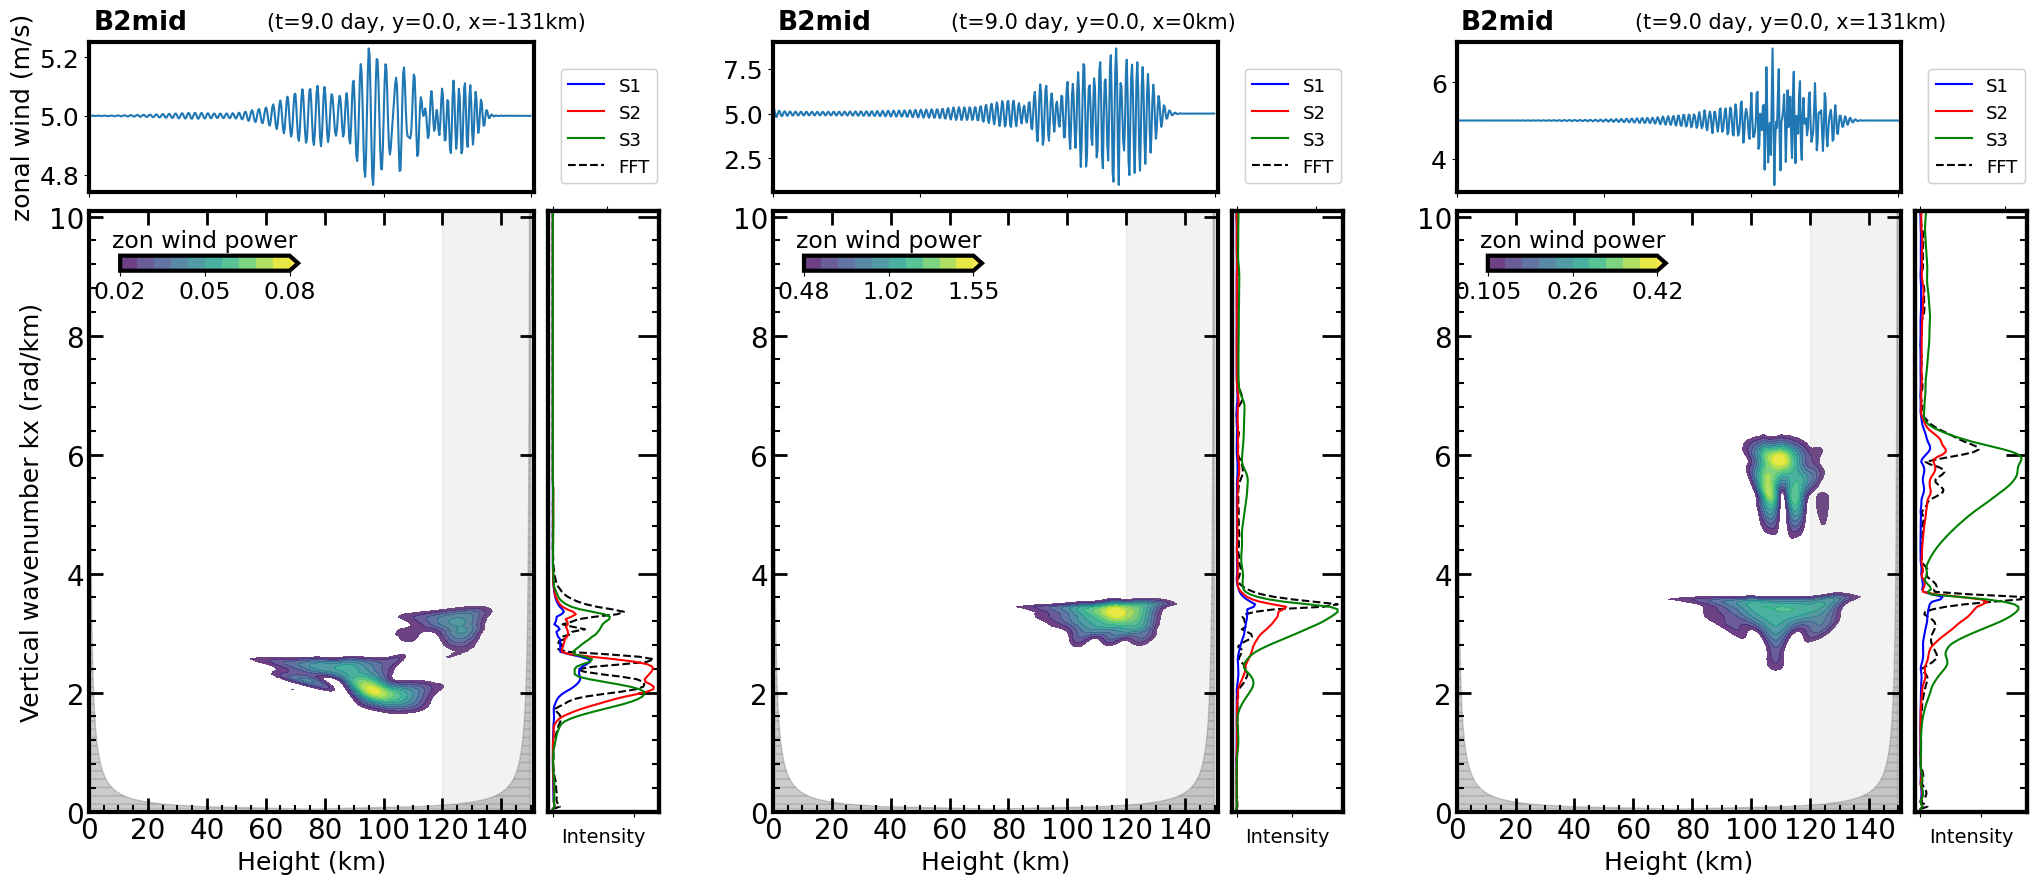

In [11]:
all_data = jb.load('../data/selected_simulations_time_short.pkl')
iname = 'B2mid'
data = all_data[iname]
u0 = data['u(t,z,0,lon)']
lon = data['lon']
time = data['time']
height = data['height'][:,1]
lon0 = int(len(lon)/2)

rows, cols = 1, 3
dz = abs(height[0] - height[1]) 
fig = plt.figure(figsize=(25, 10))  # Adjust aspect ratio
fig.tight_layout(pad=2.5)  # Use tight_layout to handle spacing automatically
######################## P1
index_l = lon0-199
uu = u0[:, index_l]
power, spectrum, freq = s_transfer(uu, dz)
powerd = power[0:len(freq), :]
spec = gridspec.GridSpecFromSubplotSpec(
            nrows=2, ncols=2,
            subplot_spec=plt.GridSpec(rows, cols)[0],
            width_ratios=[4, 1], height_ratios=[1, 4],
            wspace=0.05, hspace=0.05)

x = int(lon[index_l]*110)# zonal distance (km)
# print(iname,len(height),len(uu))
axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Height (km)', ylabel='Vertical wavenumber kx (rad/km)')
axu.set_ylabel('zonal wind (m/s)')
######################## P2
index_l = lon0
uu = u0[:, index_l]
power, spectrum, freq = s_transfer(uu, dz)
powerd = power[0:len(freq), :]
spec = gridspec.GridSpecFromSubplotSpec(
            nrows=2, ncols=2,
            subplot_spec=plt.GridSpec(rows, cols)[1],
            width_ratios=[4, 1], height_ratios=[1, 4],
            wspace=0.05, hspace=0.05)

x = int(lon[index_l]*110)# zonal distance (km)
# print(iname,len(height),len(uu))
axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Height (km)')
######################## P3
index_l = lon0+199
uu = u0[:, index_l]
power, spectrum, freq = s_transfer(uu, dz)
powerd = power[0:len(freq), :]
spec = gridspec.GridSpecFromSubplotSpec(
            nrows=2, ncols=2,
            subplot_spec=plt.GridSpec(rows, cols)[2],
            width_ratios=[4, 1], height_ratios=[1, 4],
            wspace=0.05, hspace=0.05)

x = int(lon[index_l]*110)# zonal distance (km)
# print(iname,len(height),len(uu))
axs, axu = S7(fig, spec, height, time, x, uu, powerd, spectrum, freq, iname)
axs.set(xlabel='Height (km)')

plt.savefig('../article_figs/Fig7.png',bbox_inches='tight', dpi=200)
plt.savefig('../article_figs/Fig7.pdf',bbox_inches='tight')
plt.show()

<span style="font-size:40px;">Figure 8</span>

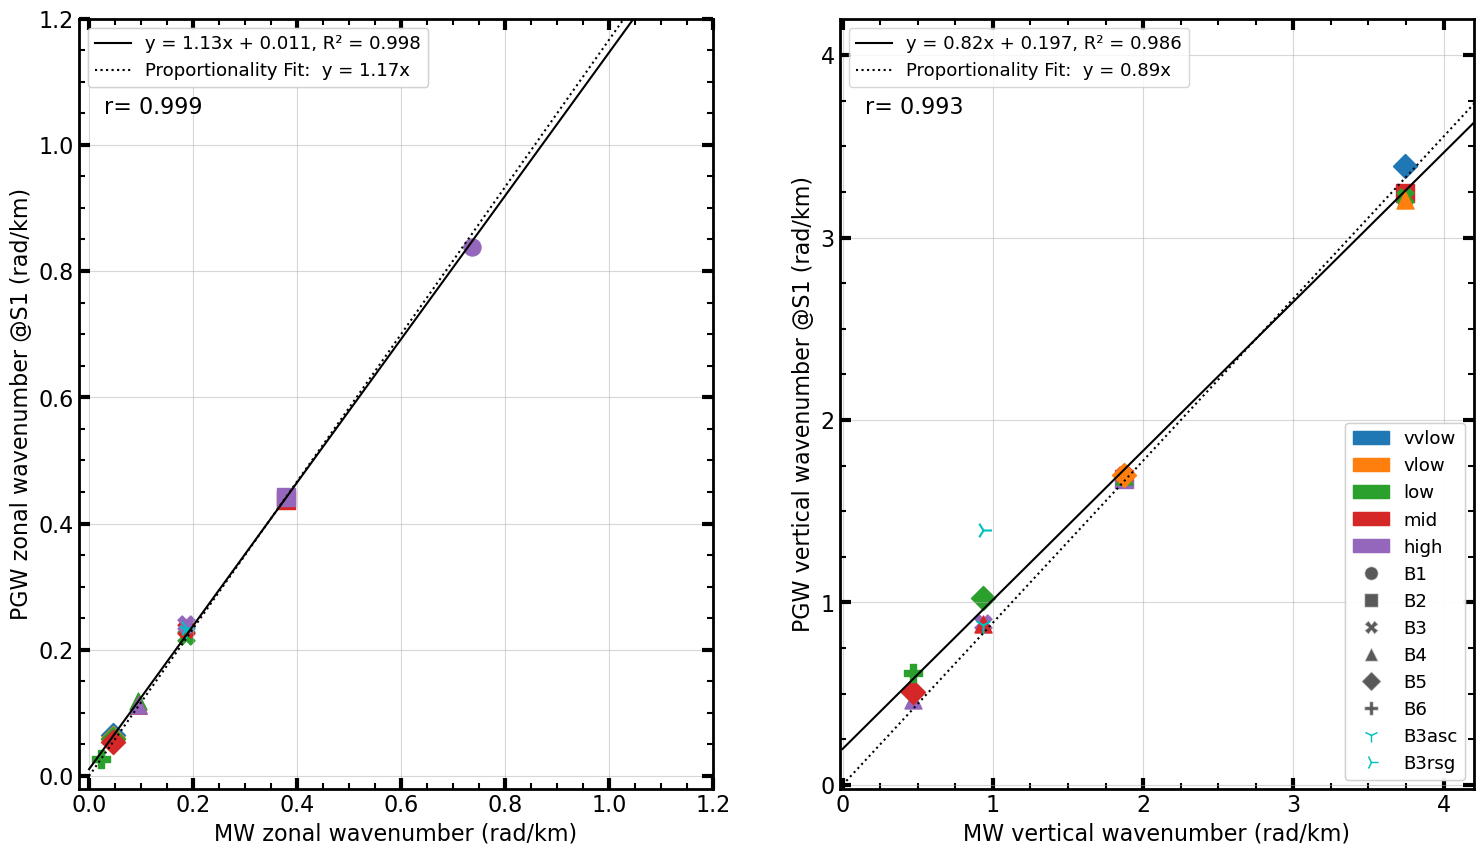

In [24]:
df = jb.load('../data/Fig8.pkl')
df, tnames, tstrength, legend_elements = marker_color(df)
df

wn = ['k','m']
x = np.arange(0, 5, 0.5)
waven = ['zonal','vertical']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
for j in [0,1]:
    ax = axes[j]

    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
####################################################### 
    # Scatter plot with colors and markers
    for i in range(len(df)):    
        ax.scatter(df.at[i, 'theory'+wn[j]], df.at[i, 'observation'+wn[j]], color=df.at[i, 'color'], s=150, marker=df.at[i, 'marker'])   
    ######################################################
    # Set axis limits
    ax.set_xlim([-0.02, 1.2+j*3])
    ax.set_ylim([-0.02, 1.2+j*3])
    ax.yaxis.set_major_locator(MultipleLocator(0.2*(j*4+1)))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05*(j*4+1)))
    ax.xaxis.set_major_locator(MultipleLocator(0.2*(j*4+1)))
    ax.xaxis.set_minor_locator(MultipleLocator(0.05*(j*4+1)))
    ######################################################
    # Add grid and labels
    plt.grid(True, alpha=0.5)
    ax.set_xlabel("MW "+waven[j]+" wavenumber (rad/km)")
    ax.set_ylabel("PGW "+waven[j]+" wavenumber @S1 (rad/km)")
    ######################################################
    # Perform Linear Regression (y = mx + c)
    xx, yy = df['theory'+wn[j]], df['observation'+wn[j]]
    
    coeffs_linear = np.polyfit(xx, yy, 1)  # Degree 1 polynomial
    y_linear = np.polyval(coeffs_linear, xx)
    r2_linear = r2_score(yy, y_linear)
    # ax.plot(xx, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")
    
    slope, intercept, r_value, p_value, std_err = linregress(xx, yy)
    y_linreg = slope * x + intercept
    p2 = ax.plot(x, y_linreg, '-k', label='Linear Regression')
    
    # Perform Proportionality Fit (y = mx)
    slope_proportional = np.sum(xx * yy) / np.sum(xx**2)  # Least-squares slope with intercept = 0
    y_proportional = slope_proportional * x
    p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')
    ######################################################
    # Add additional legend for  p2, p3
    additional_legend = ax.legend(handles=[
        plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.2f}x + {:.3f}, R² = {:.3f}".format(slope, intercept, r2_linear)),
        plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit:  y = {:.2f}x".format(slope_proportional))
    ], loc="upper left", fontsize=13)
    ######################################################
    # Add both legends to the plot
    ax.add_artist(additional_legend)  # Add the line legend manually
    
    ax.text(0.04, 0.90, "r= "+str(np.round(np.corrcoef(xx, yy)[0,1],3))
            , transform=ax.transAxes, fontsize=16,
            verticalalignment='top', horizontalalignment='left')
    ######################################################
# Legend for scatter points
scatter_legend = ax.legend(handles=legend_elements, loc="lower right", fontsize=13)
ax.add_artist(scatter_legend)  # Add the scatter legend manually


plt.savefig('../article_figs/Fig8.png',bbox_inches='tight', dpi=90)
plt.savefig('../article_figs/Fig8.pdf',bbox_inches='tight')
plt.show()

<span style="font-size:40px;">Figure 10</span>

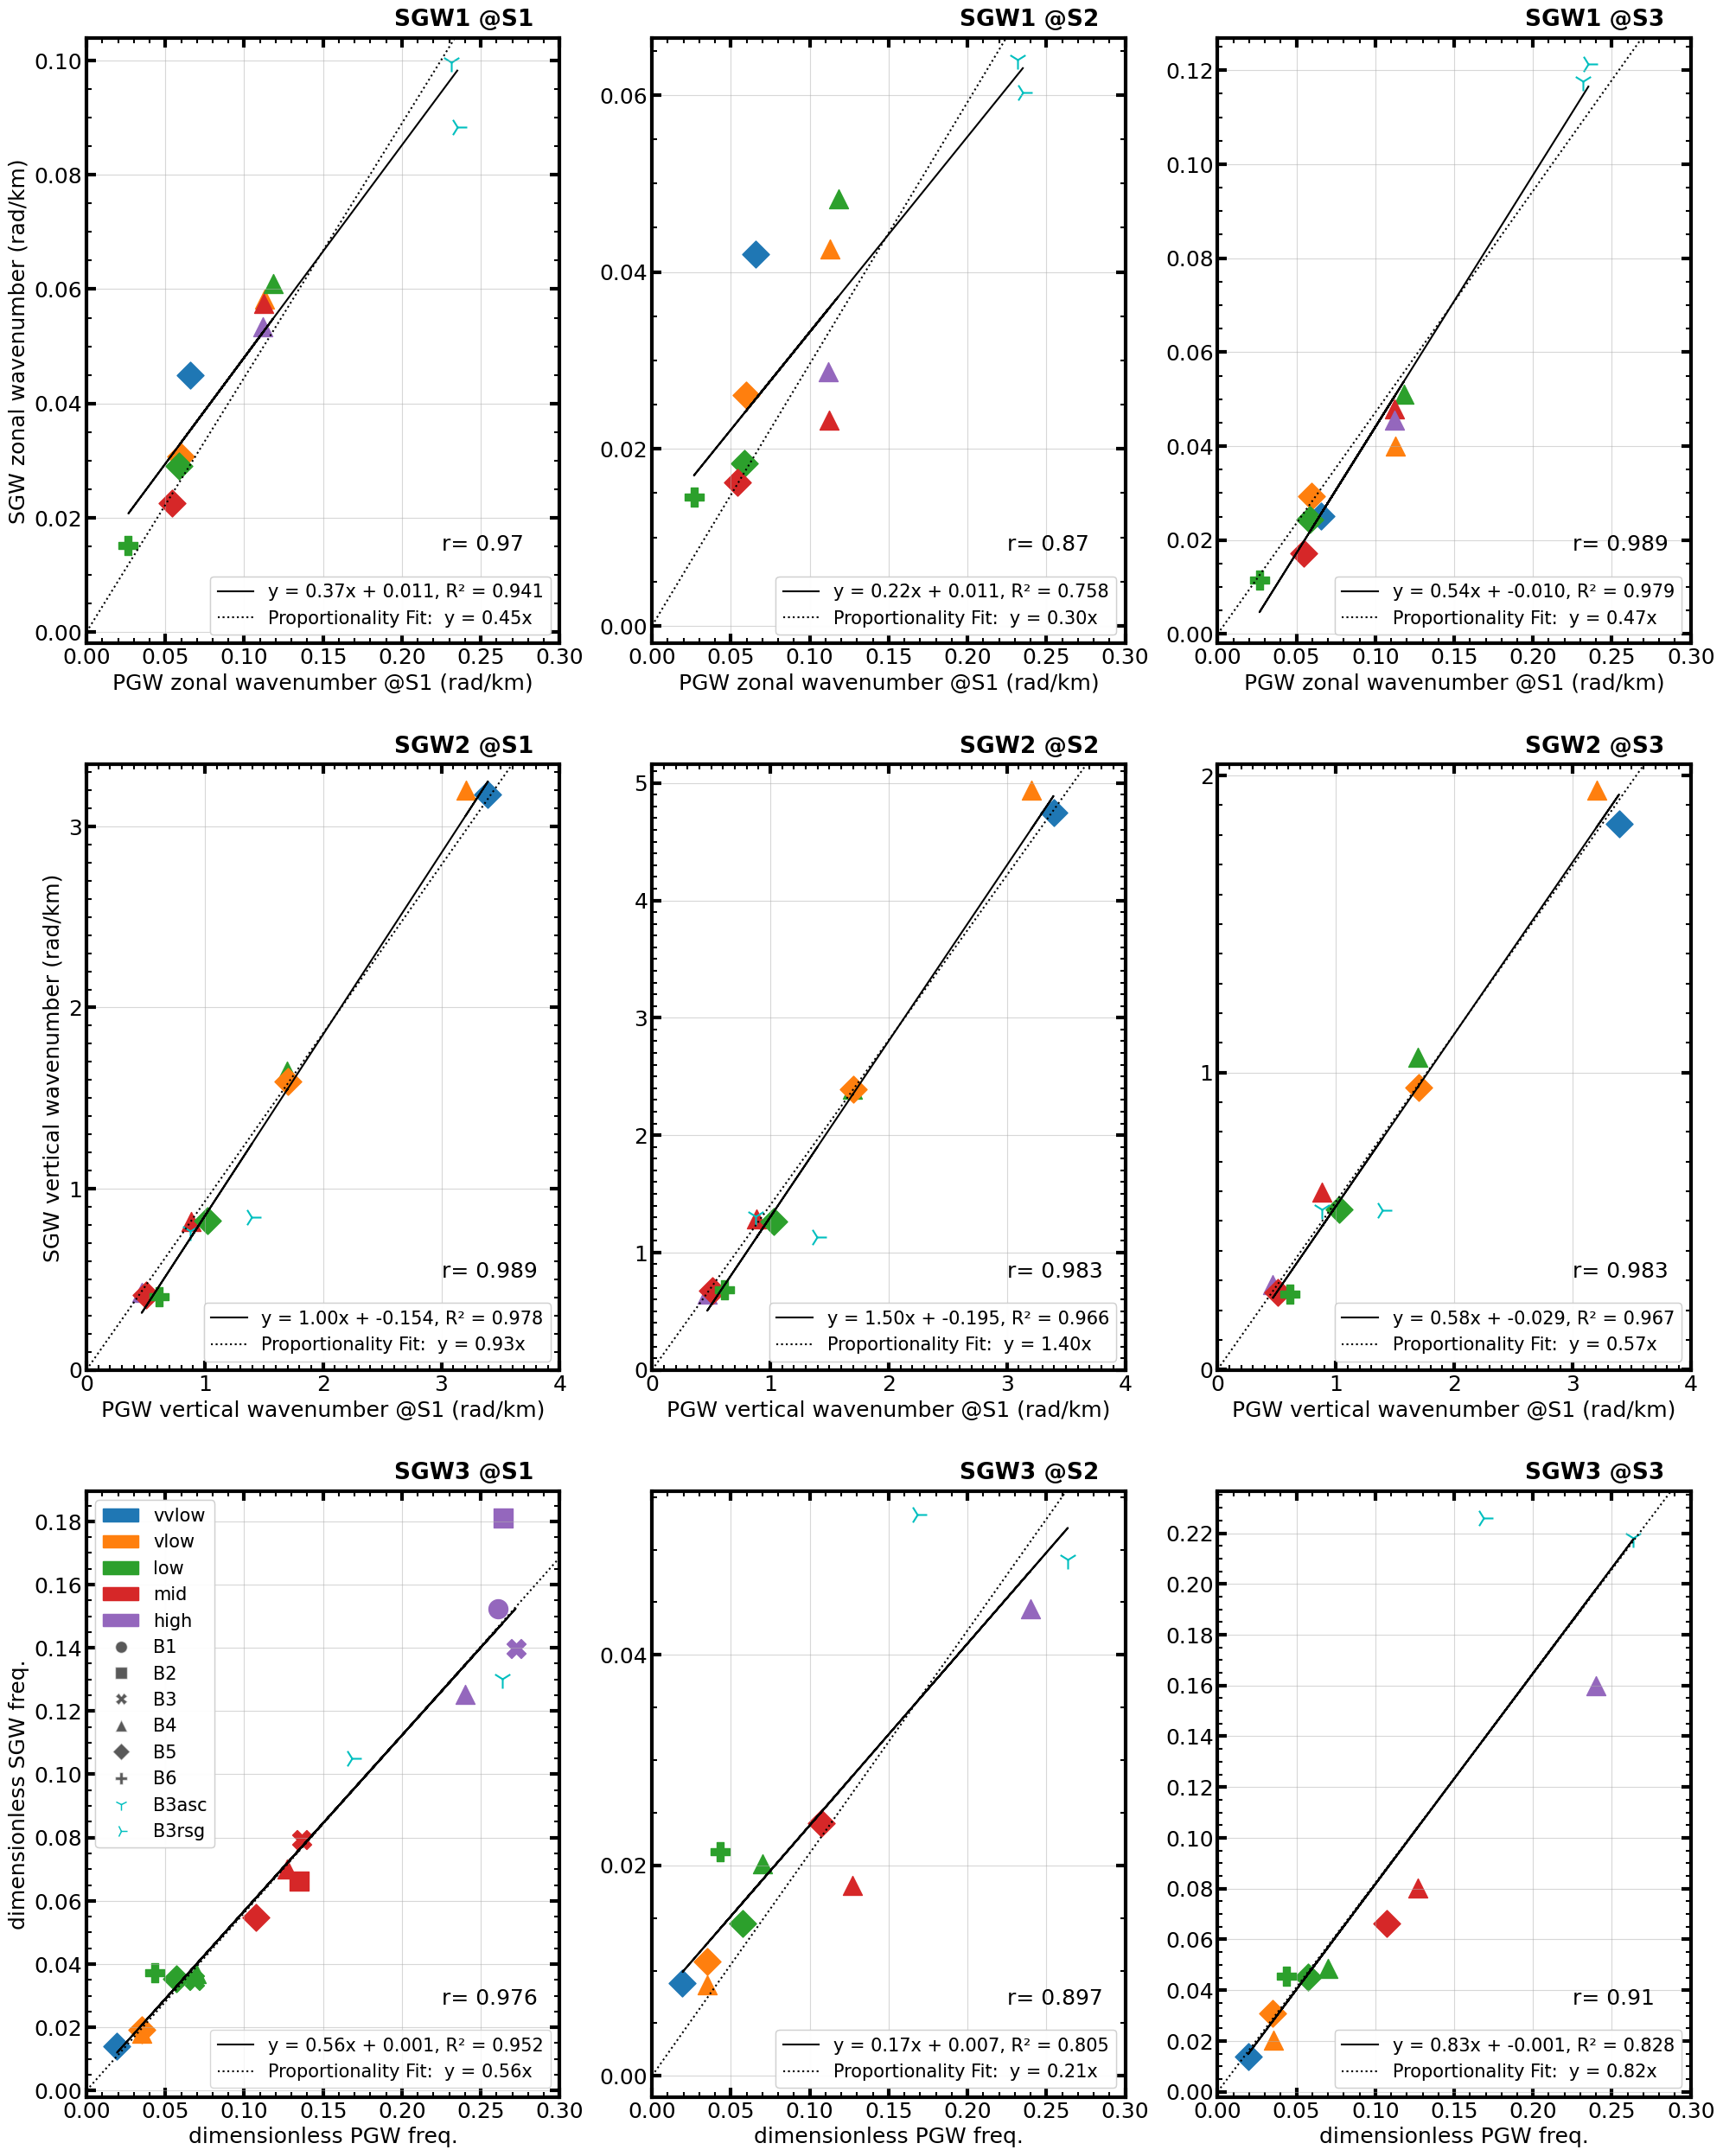

In [13]:
all_data = jb.load('../data/Fig10.pkl')

file_list = list(all_data.keys())
file_list
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 25))
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.2)

l = 0
for i in [0,1,2]:
    if i ==1:
        x=np.arange(0,4.2,0.5); x_major = 1; x_minor = 0.1; y_major = 1; y_minor = 0.1
    else:
        x=np.arange(0,0.33,0.05); x_major = 0.05; x_minor = 0.01; y_major = 0.02; y_minor = 0.005   
        
    for j in [0,1,2]:
        ax = axes[i,j]
        ############# reading data###########################################################################
        df = all_data[file_list[l]]
        df, tnames, tstrength, legend_elements = marker_color(df)
        ######################################################################################################
        # Scatter plot with colors and markers
        for k in range(len(df)):    
            ax.scatter(df.at[k, 'PGW'], df.at[k, 'SGW'], color=df.at[k, 'color'], s=250, marker=df.at[k, 'marker'])   
        ######################################################################################################
        ax.grid(True, alpha=0.5)
        ax.tick_params(axis='both', which='major',  length=8, width=3,   direction ='in', top=True, right=True)
        ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
        ax.set_xlim([x[0], x[-1]])
        ax.set_ylim([-0.002, None])
        ax.yaxis.set_major_locator(MultipleLocator(y_major))
        ax.yaxis.set_minor_locator(MultipleLocator(y_minor))
        ax.xaxis.set_major_locator(MultipleLocator(x_major))
        ax.xaxis.set_minor_locator(MultipleLocator(x_minor))
        #######################################################################################################
        
        if i ==0:
            ax.set_xlabel("PGW zonal wavenumber @S1 (rad/km)")
            if j==0:
                ax.set_ylabel("SGW zonal wavenumber (rad/km)")   
        if i ==1:
            ax.set_xlabel("PGW vertical wavenumber @S1 (rad/km)")  
            if j==0:
                ax.set_ylabel("SGW vertical wavenumber (rad/km)")
        if i ==2:
            ax.set_xlabel("dimensionless PGW freq.")
            if j==0:
                ax.set_ylabel("dimensionless SGW freq.")
        
        #######################################################################################################
        # Perform Linear Regression (y = mx + c)
        xx = df ['PGW']
        yy = df ['SGW']
        coeffs_linear = np.polyfit(xx, yy, 1)  # Degree 1 polynomial
        y_linear = np.polyval(coeffs_linear, xx)
        r2_linear = r2_score(yy, y_linear)
        ax.plot(xx, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

        # Perform Proportionality Fit (y = mx)
        slope_proportional = np.sum(xx * yy) / np.sum(xx**2)  # Least-squares slope with intercept = 0
        y_proportional = slope_proportional * x
        p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')
        #######################################################################################################
        # Add additional legend for  p2, p3
        additional_legend = ax.legend(handles=[
            plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.2f}x + {:.3f}, R² = {:.3f}".format(*coeffs_linear, r2_linear)),
            plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit:  y = {:.2f}x".format(slope_proportional))
        ], loc="lower right", fontsize=15)
        #######################################################################################################
        # Add both legends to the plot
        ax.add_artist(additional_legend)  # Add the line legend manually
        
        ax.text(0.75, 0.18, "r= "+str(np.round(np.corrcoef(xx, yy)[0,1],3))
                , transform=ax.transAxes, fontsize=18,
                verticalalignment='top', horizontalalignment='left')
        #######################################################################################################
        ax.text(
        0.65, 1.03,  # Same position for alignment
        "SGW"+str(i+1)+" @S"+str(j+1),
        fontweight='bold', fontsize=19,  # Larger font size for the main title
        ha='left', va='center', transform=ax.transAxes  # Use relative coordinates    
        )
        
        #########################################################################################################
        l +=1
    #####################################################################################################
        # Legend for scatter points
        if j ==0 and i==2:
            scatter_legend = ax.legend(handles=legend_elements, loc="upper left", fontsize=15)
            ax.add_artist(scatter_legend)  # Add the scatter legend manually
    #####################################################################################################

plt.savefig('../article_figs/Fig10.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig10.pdf',bbox_inches='tight')
plt.show()


<br><span style="font-size:40px;">Figure 11</span>

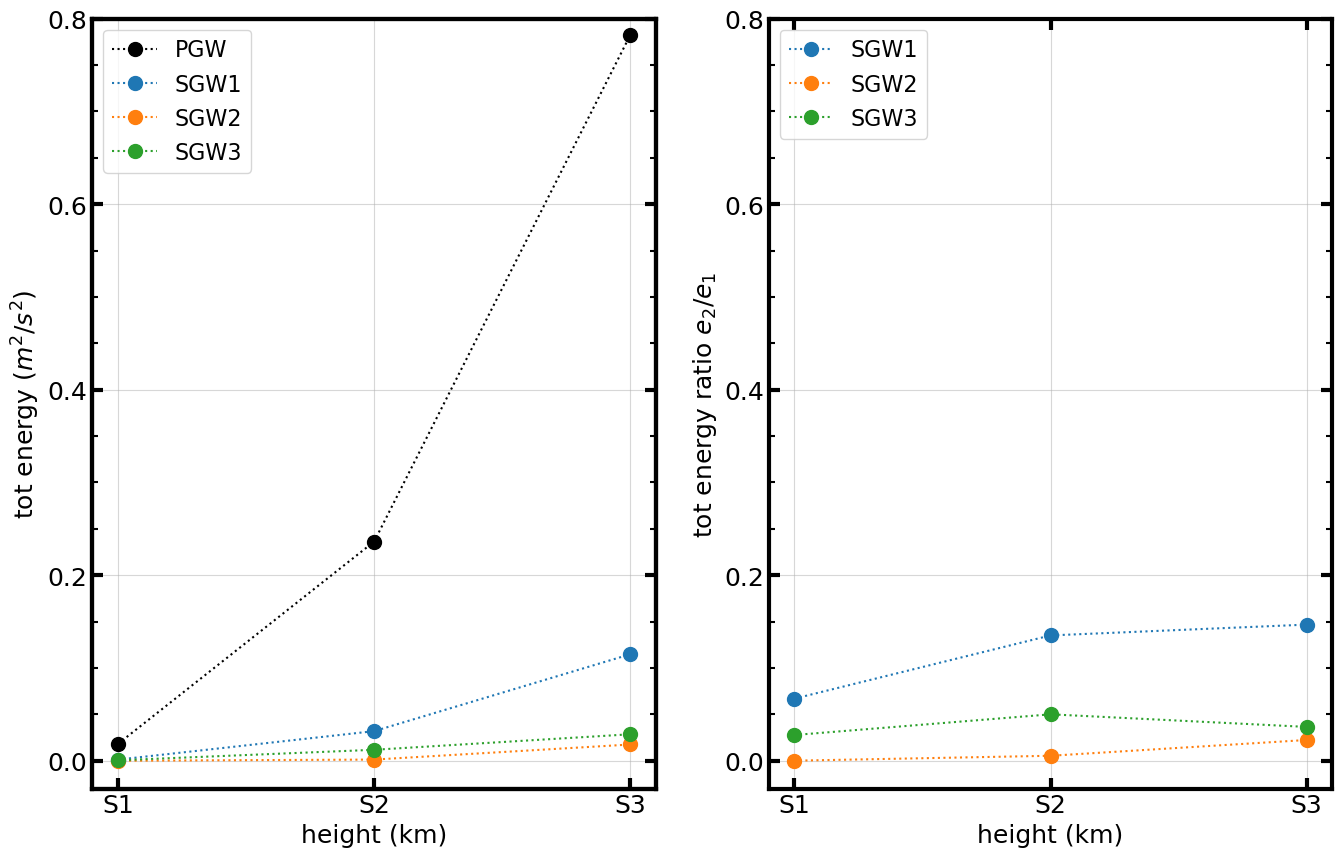

In [14]:
Table = jb.load('../data/Fig11.pkl')
x_lables = ['S1', 'S2', 'S3']


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

for j in [0,1]:
    ax = axes[j]
    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
    ###########################################################
    # Plot the primary data and collect handles/labels
    handles, labels = [], []
        
    if j==0:
        data = Table['ev']
        data2 = Table['p']
        ylabel= "tot energy $(m^2/s^2)$"
        ax2 = ax.twiny()
        line2, = ax2.plot(data2, color='k', linestyle=':', marker='o', label=data2.columns[0], markersize=10)
        handles.append(line2)
        labels.append(data2.columns[0])
    else:
        data = Table['rv']
        data2 = Table['t']
        ylabel= "tot energy ratio $e_2/e_1$"

     
    for column in data.columns:  # Loop through each column
        line, = ax.plot(data[column], label=column, linestyle=':', marker='o', markersize=10) 
        handles.append(line)
        labels.append(column)
        
    # ax2 = ax.twiny()
    # line2, = ax2.plot(data2, color='k', linestyle=':', marker='o', label=data2.columns[0])
    # handles.append(line2)
    # labels.append(data2.columns[0])
    
    ax2.xaxis.set_visible(False)  # Hide x-axis line and ticks
    ax2.tick_params(axis='x', which='both', length=0) 
    
    ax.set_xticks([80,100,120],x_lables)
    ax.legend(handles, labels, loc='upper left',  fontsize=16)
    
    ax.set(ylabel=ylabel, xlabel='height (km)')

    ax.set_ylim([-0.03, 0.8])
    ax.yaxis.set_major_locator(MultipleLocator(0.2)) 
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))

plt.savefig('../article_figs/Fig11.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig11.pdf',bbox_inches='tight')
plt.show()    

<br><span style="font-size:40px;">Figure 12</span>

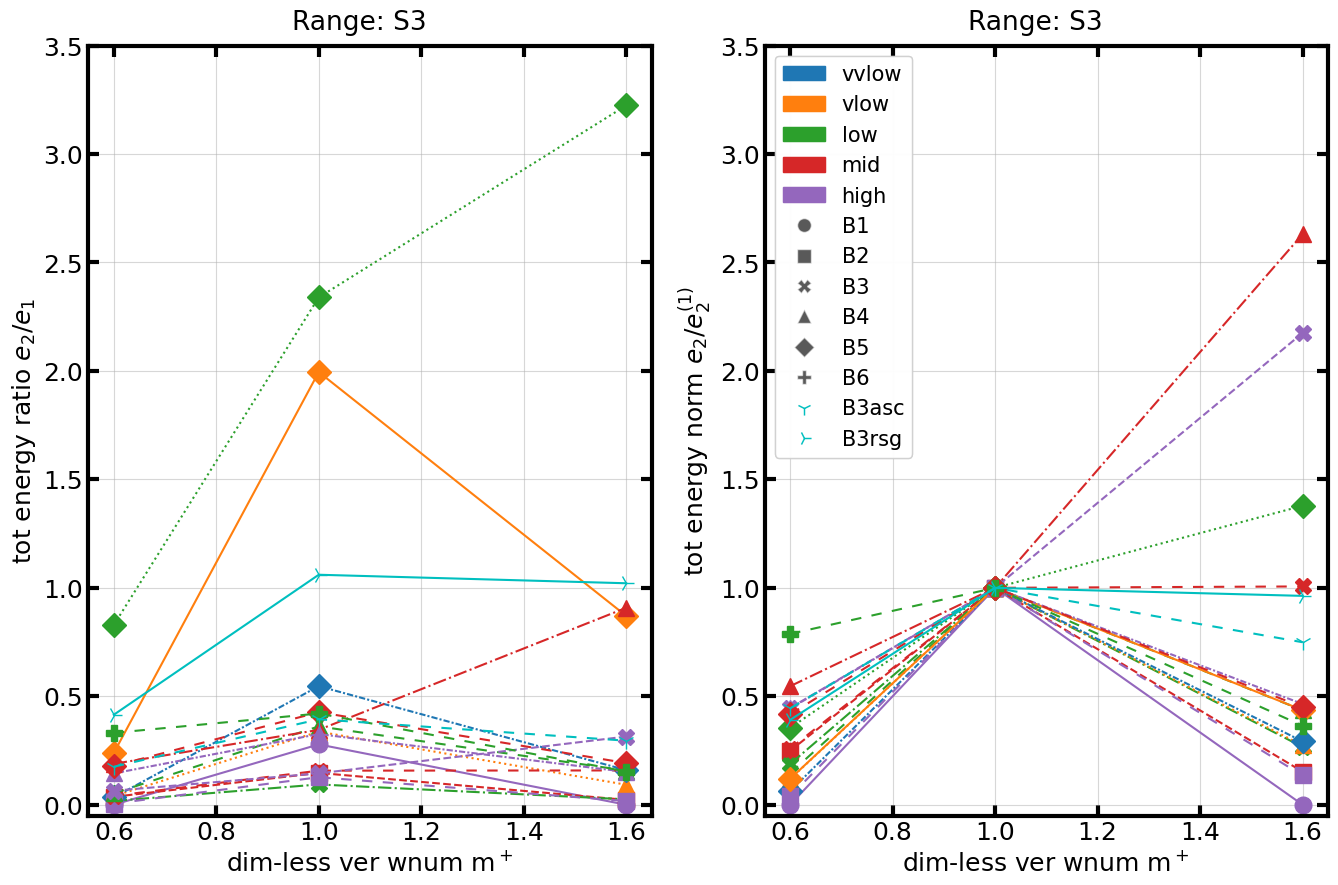

In [15]:
Table = jb.load('../data/Fig12.pkl')
x = [0.6, 1 ,1.6]

line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5)), (0, (5, 5)), (0, (5, 5))]
markers = ['o', 's', 'X', '^', 'D', 'P','1','4']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

for j in [0,1]:
    ax = axes[j]
    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
    ###########################################################
    if j==0:
        data = Table['rv']
        ylabel= "tot energy ratio $e_2/{e_1}$"        
    else:
        data = Table['nv']
        ylabel=  "tot energy norm $e_2/e_2^{(1)}$"       
        scatter_legend = ax.legend(handles=legend_elements, loc="upper left", fontsize=15)
        ax.add_artist(scatter_legend)  # Add the scatter legend manually
        
    _, tnames, tstrength, legend_elements = marker_color(data)

    for k in range(len(data)):  
        line_style = line_styles[k % len(line_styles)]  # Cycle through line styles
        y = []
        for i in x:
            y.append(data.at[k, str(i)])     
            
        ax.plot(x, y, linestyle=line_style, marker=data.at[k, 'marker'], markersize=12, color=data.at[k, 'color'], label=f"Line {k+1}")

    ax.set(ylabel=ylabel, xlabel='dim-less ver wnum m$^+$')
    ax.text( 0.6, 1.03, "Range: S3", fontsize=19, ha='right', va='center', transform=ax.transAxes)    
    ax.set_ylim([-0.05, 3.5])
    
plt.savefig('../article_figs/Fig12.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig12.pdf',bbox_inches='tight')
plt.show()    


<br>
<br><span style="font-size:40px;">Figure 13</span>

0 0.0006550223 0.0057367757
1 0.00033463642 0.0039707245
2 0.00014637357 0.0016138646
0 0.0057367757 0.56
1 0.0039707245 0.21
2 0.0016138646 0.82


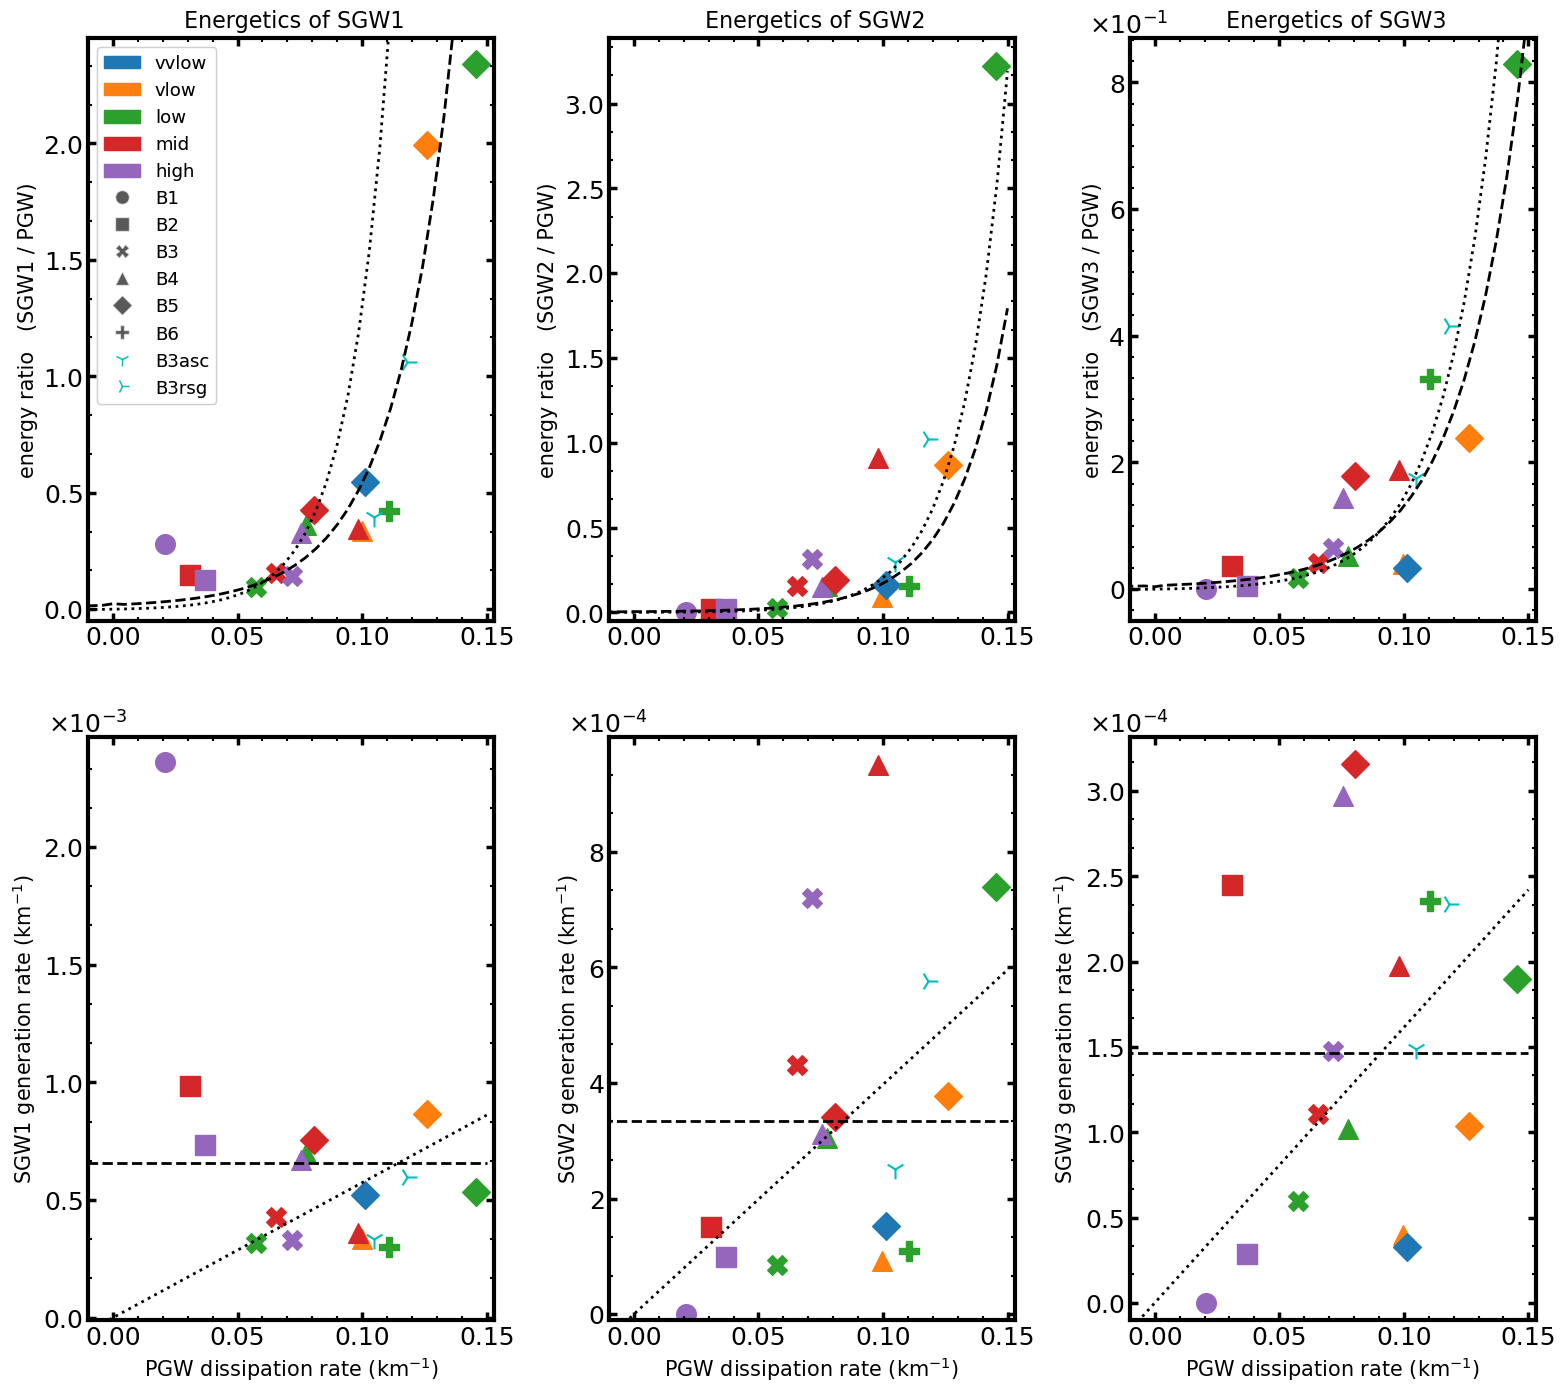

In [16]:
Table = jb.load('../data/Fig13.pkl')
headers = Table.keys()
# print(Table)
xx = np.linspace(-0.06, 0.15, num=50)
slope_proportional =[0]*3
gamma2=[0]*3
slope_omega =[0.56,0.21,0.82]
zz = [50,55,47] # z-z_break formula (33)
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 25)) #vertical plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 14)) #horizontal plot
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.2)

l = 0
for h in headers:
    ############# defining the subplot WRT the data to plot mentioned as the deaders in the dictionary ###
    j = 1 if h[0] == 'g' else 0 # j=1 for enery ratio and j=0 for generation rate 
    i = int(h[-1])-1
    ax = axes[j,i]
    ############## reading data###########################################################################
    df = Table[h]
    df, _, _, legend_elements = marker_color(df)
    ######################################################################################################
    # Scatter plot with colors and markers
    for k in range(len(df)):    
        ax.scatter(df.at[k, 'x'], df.at[k, 'y'], color=df.at[k, 'color'], s=200, marker=df.at[k, 'marker'])   
    ######################################################################################################

    ax.set_xlim([-0.01, 0.153]); ax.set_ylim([0, None])
    ax.xaxis.set_major_locator(MultipleLocator(0.05))
    ax.xaxis.set_minor_locator(MultipleLocator(0.01))
    
    y_major_locator = AutoLocator()  # Auto-detect major ticks based on range
    ax.yaxis.set_major_locator(y_major_locator)    
    # Compute minor ticks automatically as 1/3rd of major interval
    y_major_interval = y_major_locator.tick_values(*ax.get_ylim())[1] - y_major_locator.tick_values(*ax.get_ylim())[0]
    ax.yaxis.set_minor_locator(MultipleLocator(y_major_interval / 3))    

    ax.tick_params(axis='both', which='major',  length=6, width=2.5,   direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=3, width=1.5, direction ='in', top=True, right=True)
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-1, 1))  # Use scientific notation for large/small numbers
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.get_offset_text().set_position((-0.1, 0))  # Adjust (x, y) position
    #######################################################################################################    
    if j==0: ax.set_ylabel("energy ratio   (SGW"+(h[-1])+" / PGW)",fontsize=15)   
    if j==1: 
        ax.set_ylabel("SGW"+(h[-1])+" generation rate (km$^{-1}$)",fontsize=15)        
        ax.set_xlabel("PGW dissipation rate (km$^{-1}$)",fontsize=15)    
    #######################################################################################################
        # Legend for scatter points
    if i==0 and j==0:
        scatter_legend = ax.legend(handles=legend_elements, loc="upper left", fontsize=13)
        ax.add_artist(scatter_legend)  # Add the scatter legend manually  
    #######################################################################################################
    if j==0: ax.text(
        0.5, 1.03,  # Same position for alignment
        " Energetics of SGW"+(h[-1]),fontsize=16,  # Larger font size for the main title
        ha='center', va='center', transform=ax.transAxes  # Use relative coordinates    
        )
    #######################################################################################################
    # best fit ... and formula 33    

    if j==1:
        gamma2[i] = df['y'].mean()
        yy = np.ones_like(xx) * gamma2[i]
        ax.plot(xx, yy, linestyle='--', color='black', linewidth=2)

        # Perform Proportionality Fit (y = mx)
        slope_proportional[i] = np.sum( df['x'] * df['y']) / np.sum(df['x']**2)  # Least-squares slope with intercept = 0
        yy = slope_proportional[i] * xx
        ax.plot(xx, yy, linestyle=':', color='black', linewidth=2)
        ax.set_ylim([-0.00001, None])
        print (i,df['y'].mean(),slope_proportional[i])

    if j==0:
        zzi=zz[i]
        if i==0: 
            zzi=60
        yy = (np.exp(xx*zzi)-1)*slope_proportional[i] * slope_omega[i] 
        ax.plot(xx, yy, linestyle=':', color='black', linewidth=2)
        yy = (np.exp(xx*zz[i])-1)*gamma2[i]/xx * slope_omega[i] 
        ax.plot(xx, yy, linestyle='--', color='black', linewidth=2)
        ax.set_ylim([-0.05, None])
        print(i,slope_proportional[i],slope_omega[i])
        
plt.savefig('../article_figs/Fig13.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig13.pdf',bbox_inches='tight')   

plt.show()  

<br><span style="font-size:40px;">Figure 14</span>

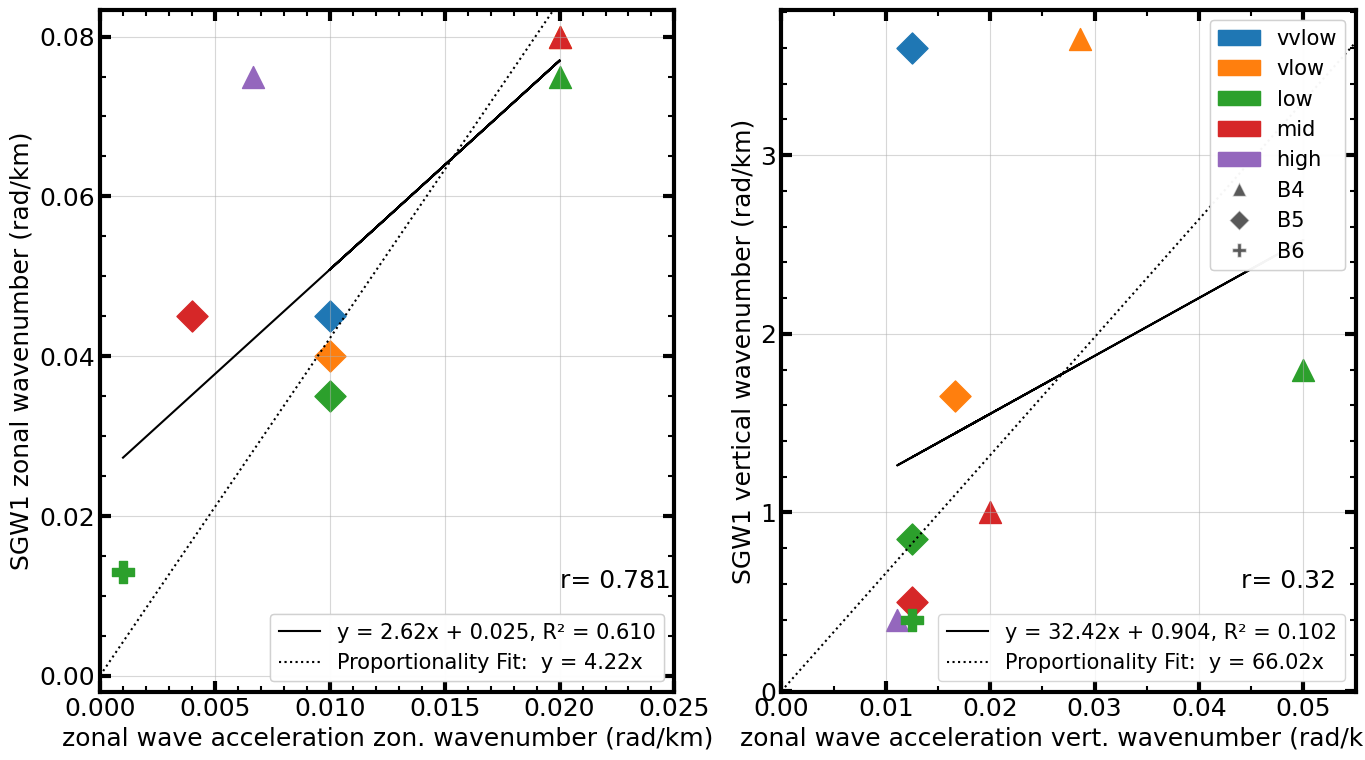

In [17]:
Table = jb.load('../data/Fig14.pkl')

file_list = list(Table.keys())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
fig.tight_layout(pad=1.5)  # Reduce overall padding 
fig.subplots_adjust(hspace=0.2)

for j in [0,1]:
    ax = axes[j]

    if j ==0:
        x=np.arange(0,0.03,0.005); x_major = 0.005; x_minor = 0.001; y_major = 0.02; y_minor = 0.005
    else:
        x=np.arange(0,0.06,0.005); x_major = 0.01; x_minor = 0.005; y_major = 1; y_minor = 0.2   
    
    ############# reading data###########################################################################
    df = Table[file_list[j]]
    df, tnames, tstrength, legend_elements = marker_color(df)
    ######################################################################################################
    # Scatter plot with colors and markers
    for k in range(len(df)):    
        ax.scatter(df.at[k, 'PGW'], df.at[k, 'SGW'], color=df.at[k, 'color'], s=250, marker=df.at[k, 'marker'])   
    ######################################################################################################
    ax.grid(True, alpha=0.5)
    ax.tick_params(axis='both', which='major',  length=8, width=3,   direction ='in', top=True, right=True)
    ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)
    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([-0.002, None])
    ax.yaxis.set_major_locator(MultipleLocator(y_major))
    ax.yaxis.set_minor_locator(MultipleLocator(y_minor))
    ax.xaxis.set_major_locator(MultipleLocator(x_major))
    ax.xaxis.set_minor_locator(MultipleLocator(x_minor))
    #######################################################################################################
    
    if j==0:
        ax.set_xlabel("zonal wave acceleration zon. wavenumber (rad/km)",fontsize=18)
        ax.set_ylabel("SGW1 zonal wavenumber (rad/km)",fontsize=18)   
    if j==1:
        ax.set_xlabel("zonal wave acceleration vert. wavenumber (rad/km)",fontsize=18)  
        ax.set_ylabel("SGW1 vertical wavenumber (rad/km)",fontsize=18)

    
    #######################################################################################################
    # Perform Linear Regression (y = mx + c)
    xx = df ['PGW']
    yy = df ['SGW']
    coeffs_linear = np.polyfit(xx, yy, 1)  # Degree 1 polynomial
    y_linear = np.polyval(coeffs_linear, xx)
    r2_linear = r2_score(yy, y_linear)
    ax.plot(xx, y_linear, '-k', label=f"Linear Fit (R²={r2_linear:.2f})")

    # Perform Proportionality Fit (y = mx)
    slope_proportional = np.sum(xx * yy) / np.sum(xx**2)  # Least-squares slope with intercept = 0
    y_proportional = slope_proportional * x
    p3 = ax.plot(x, y_proportional, ':k', label='Proportionality Fit')
    #######################################################################################################
    # Add additional legend for  p2, p3
    additional_legend = ax.legend(handles=[
        plt.Line2D([0], [0], linestyle='-', color='k', label="y = {:.2f}x + {:.3f}, R² = {:.3f}".format(*coeffs_linear, r2_linear)),
        plt.Line2D([0], [0], linestyle=':', color='k', label="Proportionality Fit:  y = {:.2f}x".format(slope_proportional))
    ], loc="lower right", fontsize=15)
    #######################################################################################################
    # Add both legends to the plot
    ax.add_artist(additional_legend)  # Add the line legend manually
    
    ax.text(0.80, 0.18, "r= "+str(np.round(np.corrcoef(xx, yy)[0,1],3))
            , transform=ax.transAxes, fontsize=18,
            verticalalignment='top', horizontalalignment='left')
    
       
    #####################################################################################################
    if j==1:
        scatter_legend = ax.legend(handles=legend_elements, loc="upper right", fontsize=15)
        ax.add_artist(scatter_legend)  # Add the scatter legend manually
    #####################################################################################################

plt.savefig('../article_figs/Fig14.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig14.pdf',bbox_inches='tight')
plt.show()

<br><span style="font-size:40px;">Figure 15</span>

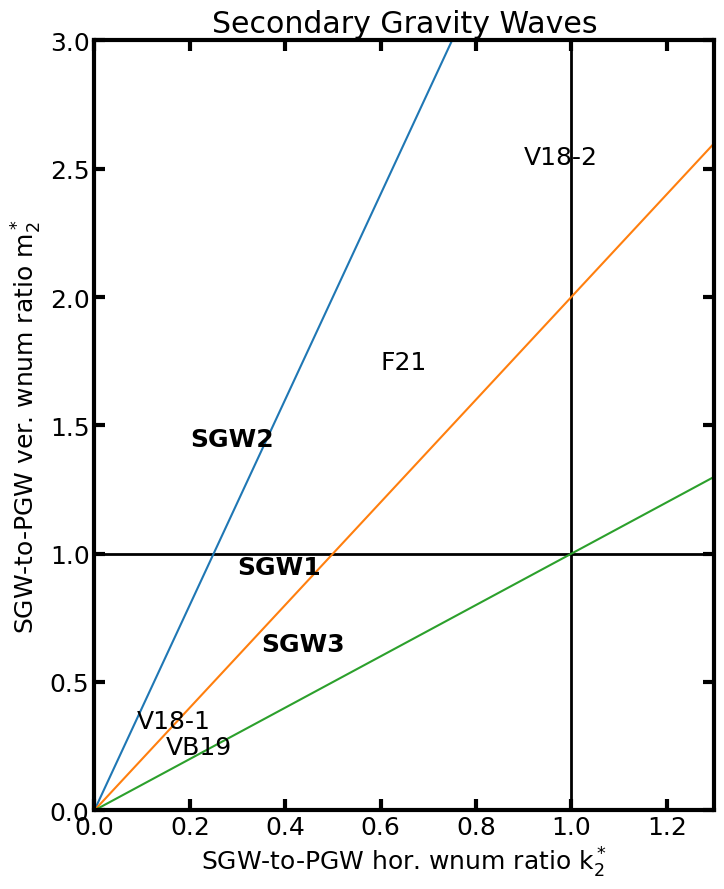

In [18]:
fig, ax = plt.subplots(figsize=(8, 10))

ax.tick_params(axis='both', which='major',  length=8, width=3, direction ='in', top=True, right=True)
ax.tick_params(axis='both', which='minor',  length=4, width=1.5, direction ='in', top=True, right=True)

x=np.arange(0,2,0.5)

# Add horizontal and vertical lines
ax.axhline(y=1, color='k', linestyle='-', linewidth=2)  # Horizontal line
ax.axvline(x=1, color='k', linestyle='-', linewidth=2)  # Vertical line

for a in [0.25, 0.5, 1]:
    ax.plot(x,x/a)

S = [ 'F21',     'V18-1',     'VB19',   'V18-2']
C = [ [0.6,1.7], [0.09, 0.3], [0.15,0.2], [0.9,2.5] ]
S2= ['SGW1', 'SGW2', 'SGW3']
C2 = [[0.3,0.9], [0.2,1.4], [0.35,0.6]]

for i, (text, coord) in enumerate(zip(S, C)):
    ax.text(coord[0], coord[1], text, color='k', ha='left', va='bottom')
for i, (text, coord) in enumerate(zip(S2, C2)):
    ax.text(coord[0], coord[1], text, color='k', ha='left', va='bottom', fontweight='bold')


ax.set_xlim([0, 1.3])
ax.set_ylim([0, 3])

# Add grid and labels
ax.set_ylabel("SGW-to-PGW ver. wnum ratio m$^*_2$")
ax.set_xlabel("SGW-to-PGW hor. wnum ratio k$^*_2$")
ax.set_title("Secondary Gravity Waves")

     
plt.savefig('../article_figs/Fig15.png',bbox_inches='tight')
plt.savefig('../article_figs/Fig15.pdf',bbox_inches='tight')   

plt.show()  